Starting analysis of data in step1 folder...

Processing depth3...
Loaded depth3 data, shape: (15, 9)
Columns: ['gamma', 'layer', 'avg_js_distance_mean', 'avg_js_distance_std', 'weighted_avg_renyi_entropy_mean', 'weighted_avg_renyi_entropy_std', 'node_count_mean', 'node_count_std', 'run_id_count']

depth3 data overview:
Gamma range: 0.001 - 0.1
Layer range: 0.0 - 2.0
JS Distance mean range: 0.0000 - 0.5069
Renyi Entropy mean range: 4.8972 - 5.2068


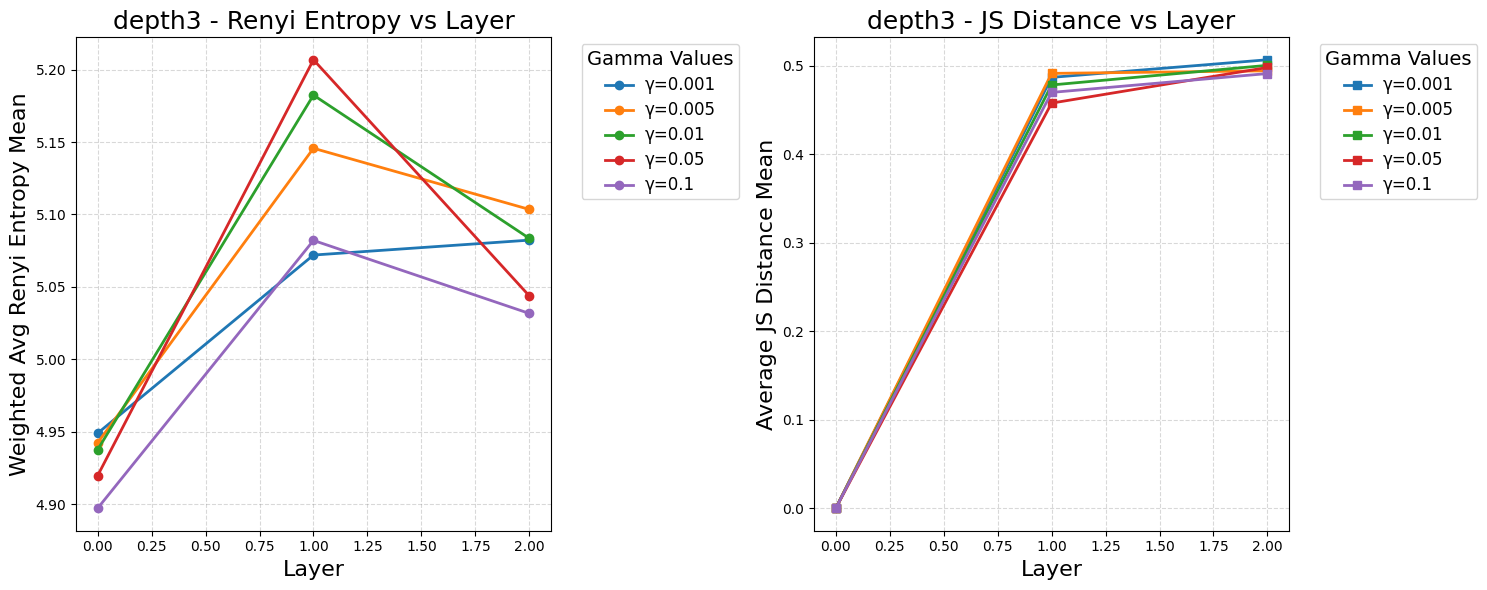

Plot saved to: /Volumes/My Passport/收敛结果/step1/depth3_gamma_layer_analysis.png

Processing depth4...
Loaded depth4 data, shape: (20, 9)
Columns: ['gamma', 'layer', 'avg_js_distance_mean', 'avg_js_distance_std', 'weighted_avg_renyi_entropy_mean', 'weighted_avg_renyi_entropy_std', 'node_count_mean', 'node_count_std', 'run_id_count']

depth4 data overview:
Gamma range: 0.001 - 0.1
Layer range: 0.0 - 3.0
JS Distance mean range: 0.0000 - 0.4863
Renyi Entropy mean range: 4.7957 - 5.2672


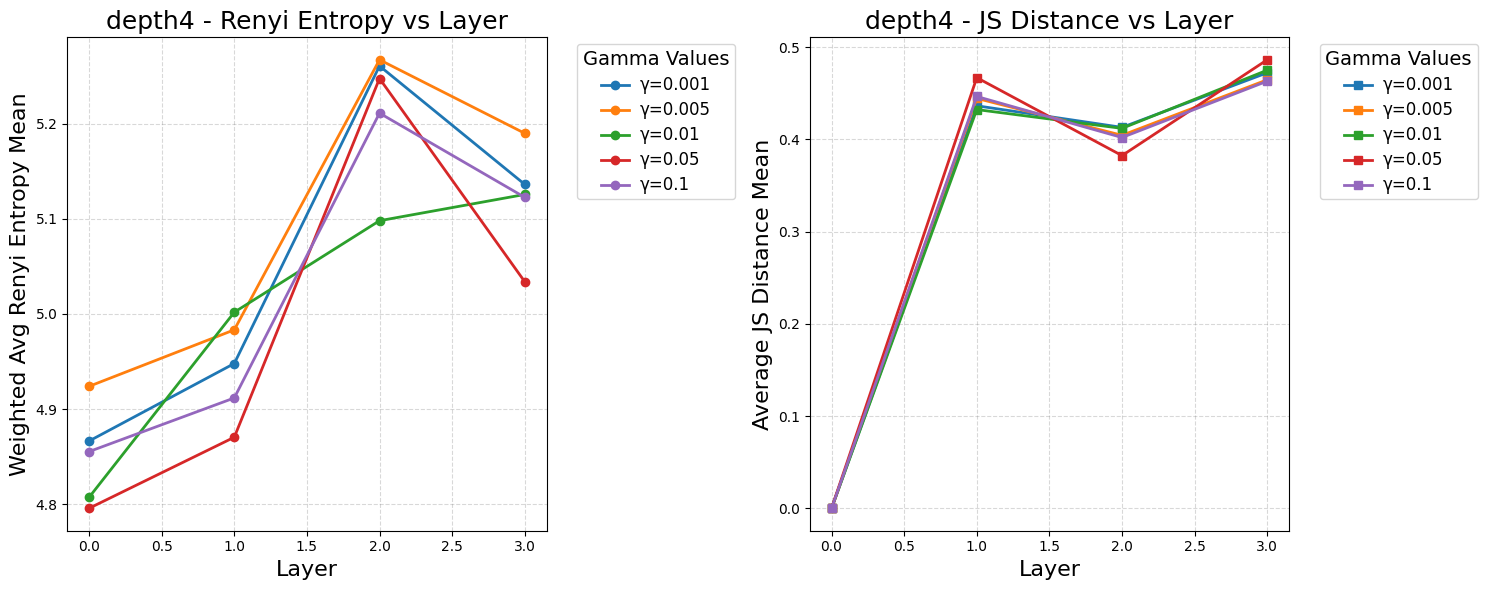

Plot saved to: /Volumes/My Passport/收敛结果/step1/depth4_gamma_layer_analysis.png

Processing depth5...
Loaded depth5 data, shape: (25, 9)
Columns: ['gamma', 'layer', 'avg_js_distance_mean', 'avg_js_distance_std', 'weighted_avg_renyi_entropy_mean', 'weighted_avg_renyi_entropy_std', 'node_count_mean', 'node_count_std', 'run_id_count']

depth5 data overview:
Gamma range: 0.001 - 0.1
Layer range: 0.0 - 4.0
JS Distance mean range: 0.0000 - 0.4874
Renyi Entropy mean range: 4.6744 - 5.2765


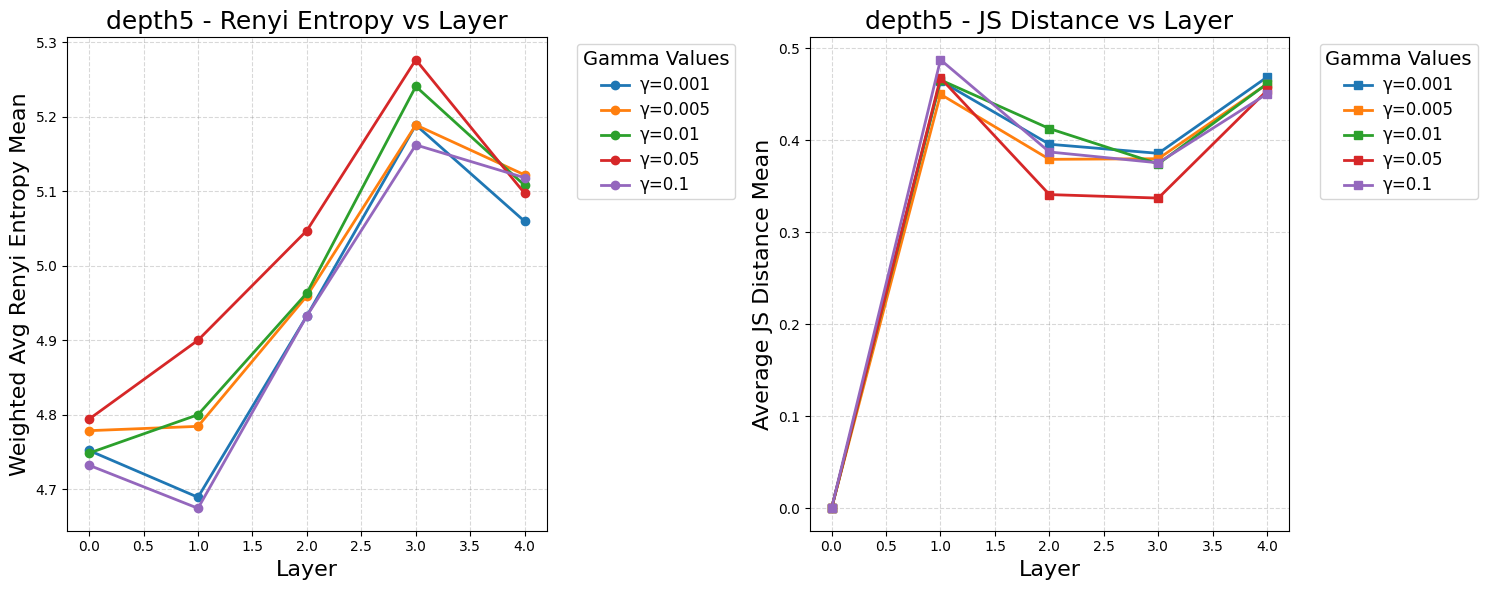

Plot saved to: /Volumes/My Passport/收敛结果/step1/depth5_gamma_layer_analysis.png

Analysis completed!

Gamma values comparison across depths:
depth3: [0.001, 0.005, 0.01, 0.05, 0.1]
depth4: [0.001, 0.005, 0.01, 0.05, 0.1]
depth5: [0.001, 0.005, 0.01, 0.05, 0.1]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

# Set font and plot style - 修改为浅色样式
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('default')  # 改为default样式

# 设置浅色背景和网格样式
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['axes.axisbelow'] = True

# Set working directory
base_path = Path("/Volumes/My Passport/收敛结果/step1")

def load_and_analyze_depth_data(depth_folder):
    """Load and analyze data from specific depth folder"""
    depth_path = base_path / depth_folder
    
    # Extract depth number from folder name and construct correct filename
    depth_num = depth_folder.replace('depth', '')
    comparison_file = depth_path / f"d{depth_num}_gamma_layer_comparison.csv"
    
    if not comparison_file.exists():
        print(f"Warning: {comparison_file} does not exist")
        return None
    
    # Read data
    df = pd.read_csv(comparison_file)
    print(f"Loaded {depth_folder} data, shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    
    return df

def plot_gamma_layer_analysis(df, depth_name):
    """Plot gamma-layer analysis for single depth"""
    # Get all unique gamma values
    gamma_values = sorted(df['gamma'].unique())
    
    # Create color mapping - 使用更鲜艳的颜色
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.patch.set_facecolor('white')  # 设置图形背景为白色
    
    # Plot 1: Renyi Entropy (左边)
    for i, gamma in enumerate(gamma_values):
        gamma_data = df[df['gamma'] == gamma]
        ax1.plot(gamma_data['layer'], gamma_data['weighted_avg_renyi_entropy_mean'], 
                marker='o', linewidth=2, markersize=6, 
                color=colors[i % len(colors)], label=f'γ={gamma}')
    
    ax1.set_xlabel('Layer', fontsize=16)
    ax1.set_ylabel('Weighted Avg Renyi Entropy Mean', fontsize=16)
    ax1.set_title(f'{depth_name} - Renyi Entropy vs Layer', fontsize=18)
    ax1.set_facecolor('white')  # 设置子图背景为白色
    
    legend1 = ax1.legend(title='Gamma Values', bbox_to_anchor=(1.05, 1), loc='upper left')
    legend1.get_title().set_fontsize(14)
    plt.setp(legend1.get_texts(), fontsize=12)
    
    # 设置浅色网格
    ax1.grid(True, alpha=0.3, linestyle='--', color='gray')
    
    # Plot 2: JS Distance (右边)
    for i, gamma in enumerate(gamma_values):
        gamma_data = df[df['gamma'] == gamma]
        ax2.plot(gamma_data['layer'], gamma_data['avg_js_distance_mean'], 
                marker='s', linewidth=2, markersize=6, 
                color=colors[i % len(colors)], label=f'γ={gamma}')
    
    ax2.set_xlabel('Layer', fontsize=16)
    ax2.set_ylabel('Average JS Distance Mean', fontsize=16)
    ax2.set_title(f'{depth_name} - JS Distance vs Layer', fontsize=18)
    ax2.set_facecolor('white')  # 设置子图背景为白色
    
    legend2 = ax2.legend(title='Gamma Values', bbox_to_anchor=(1.05, 1), loc='upper left')
    legend2.get_title().set_fontsize(14)
    plt.setp(legend2.get_texts(), fontsize=12)
    
    # 设置浅色网格
    ax2.grid(True, alpha=0.3, linestyle='--', color='gray')
    
    plt.tight_layout()
    return fig

# Main analysis loop
depth_folders = ['depth3', 'depth4', 'depth5']
all_data = {}

print("Starting analysis of data in step1 folder...")
print("="*50)

for depth_folder in depth_folders:
    print(f"\nProcessing {depth_folder}...")
    
    # Load data
    df = load_and_analyze_depth_data(depth_folder)
    
    if df is not None:
        all_data[depth_folder] = df
        
        # Display basic data information
        print(f"\n{depth_folder} data overview:")
        print(f"Gamma range: {df['gamma'].min()} - {df['gamma'].max()}")
        print(f"Layer range: {df['layer'].min()} - {df['layer'].max()}")
        print(f"JS Distance mean range: {df['avg_js_distance_mean'].min():.4f} - {df['avg_js_distance_mean'].max():.4f}")
        print(f"Renyi Entropy mean range: {df['weighted_avg_renyi_entropy_mean'].min():.4f} - {df['weighted_avg_renyi_entropy_mean'].max():.4f}")
        
        # Create plots
        fig = plot_gamma_layer_analysis(df, depth_folder)
        plt.show()
        
        # Save plots
        output_path = base_path / f"{depth_folder}_gamma_layer_analysis.png"
        fig.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {output_path}")
    else:
        print(f"Skipping {depth_folder}, data file does not exist")

print("\n" + "="*50)
print("Analysis completed!")

# Display gamma values comparison across all depths
if all_data:
    print("\nGamma values comparison across depths:")
    for depth, df in all_data.items():
        gamma_values = sorted(df['gamma'].unique())
        print(f"{depth}: {gamma_values}")

Starting analysis of data in step1 folder...

Processing depth3...
Loaded depth3 data, shape: (15, 9)
Columns: ['gamma', 'layer', 'avg_js_distance_mean', 'avg_js_distance_std', 'weighted_avg_renyi_entropy_mean', 'weighted_avg_renyi_entropy_std', 'node_count_mean', 'node_count_std', 'run_id_count']

depth3 data overview:
Gamma range: 0.001 - 0.1
Layer range: 0.0 - 2.0
JS Distance mean range: 0.0000 - 0.5069
Renyi Entropy mean range: 4.8972 - 5.2068

Processing depth4...
Loaded depth4 data, shape: (20, 9)
Columns: ['gamma', 'layer', 'avg_js_distance_mean', 'avg_js_distance_std', 'weighted_avg_renyi_entropy_mean', 'weighted_avg_renyi_entropy_std', 'node_count_mean', 'node_count_std', 'run_id_count']

depth4 data overview:
Gamma range: 0.001 - 0.1
Layer range: 0.0 - 3.0
JS Distance mean range: 0.0000 - 0.4863
Renyi Entropy mean range: 4.7957 - 5.2672

Processing depth5...
Loaded depth5 data, shape: (25, 9)
Columns: ['gamma', 'layer', 'avg_js_distance_mean', 'avg_js_distance_std', 'weighted

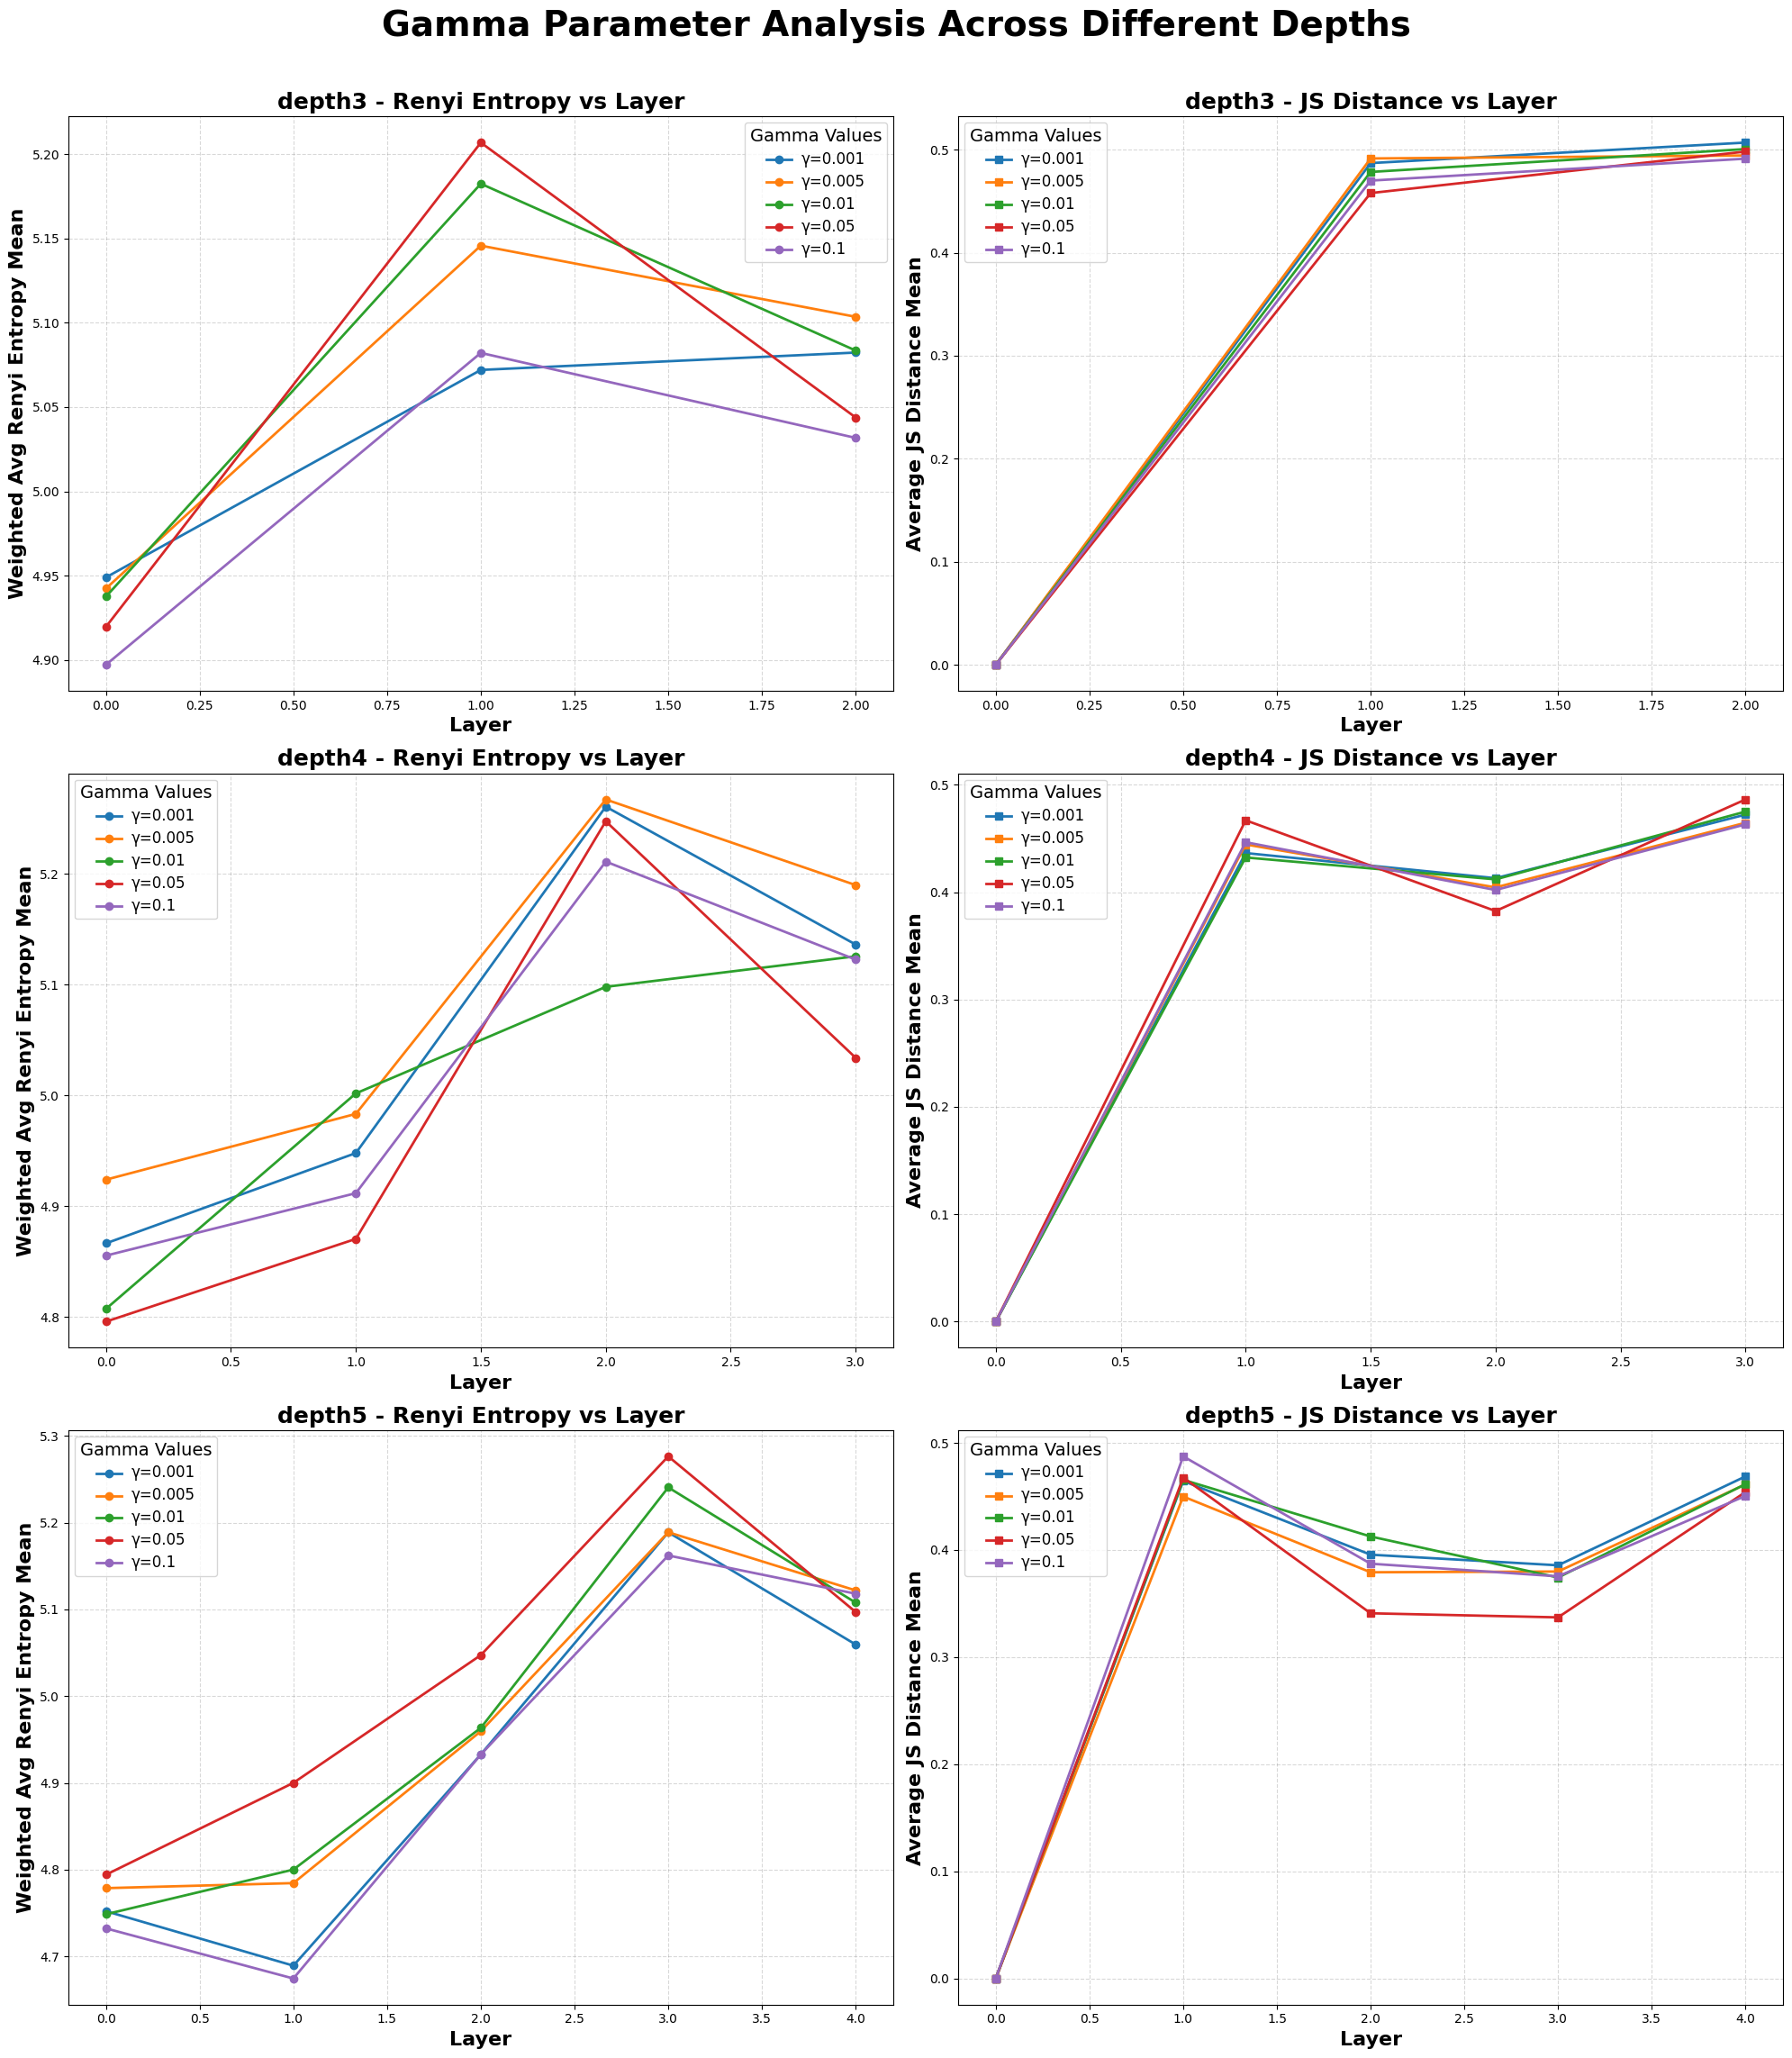


Analysis completed!

Gamma values comparison across depths:
depth3: [0.001, 0.005, 0.01, 0.05, 0.1]
depth4: [0.001, 0.005, 0.01, 0.05, 0.1]
depth5: [0.001, 0.005, 0.01, 0.05, 0.1]


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

# Set font and plot style - 修改为浅色样式
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('default')  # 改为default样式

# 设置浅色背景和网格样式
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['axes.axisbelow'] = True

# Set working directory
base_path = Path("/Volumes/My Passport/收敛结果/step1")

def load_and_analyze_depth_data(depth_folder):
    """Load and analyze data from specific depth folder"""
    depth_path = base_path / depth_folder
    
    # Extract depth number from folder name and construct correct filename
    depth_num = depth_folder.replace('depth', '')
    comparison_file = depth_path / f"d{depth_num}_gamma_layer_comparison.csv"
    
    if not comparison_file.exists():
        print(f"Warning: {comparison_file} does not exist")
        return None
    
    # Read data
    df = pd.read_csv(comparison_file)
    print(f"Loaded {depth_folder} data, shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    
    return df

def plot_gamma_layer_analysis(df, depth_name, ax1, ax2):
    """
    Plot gamma-layer analysis for a single depth on the provided axes.
    (不再创建新的figure)
    """
    # Get all unique gamma values
    gamma_values = sorted(df['gamma'].unique())
    
    # Create color mapping - 使用更鲜艳的颜色
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    # Plot 1: Renyi Entropy (左边)
    for i, gamma in enumerate(gamma_values):
        gamma_data = df[df['gamma'] == gamma]
        ax1.plot(gamma_data['layer'], gamma_data['weighted_avg_renyi_entropy_mean'], 
                marker='o', linewidth=2, markersize=6, 
                color=colors[i % len(colors)], label=f'γ={gamma}')
    
    ax1.set_xlabel('Layer', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Weighted Avg Renyi Entropy Mean', fontsize=16, fontweight='bold')
    ax1.set_title(f'{depth_name} - Renyi Entropy vs Layer', fontsize=18, fontweight='bold')
    ax1.set_facecolor('white')
    
    legend1 = ax1.legend(title='Gamma Values')
    legend1.get_title().set_fontsize(14)
    plt.setp(legend1.get_texts(), fontsize=12)
    
    ax1.grid(True, alpha=0.3, linestyle='--', color='gray')
    
    # Plot 2: JS Distance (右边)
    for i, gamma in enumerate(gamma_values):
        gamma_data = df[df['gamma'] == gamma]
        ax2.plot(gamma_data['layer'], gamma_data['avg_js_distance_mean'], 
                marker='s', linewidth=2, markersize=6, 
                color=colors[i % len(colors)], label=f'γ={gamma}')
    
    ax2.set_xlabel('Layer', fontsize=16, fontweight='bold')
    ax2.set_ylabel('Average JS Distance Mean', fontsize=16, fontweight='bold')
    ax2.set_title(f'{depth_name} - JS Distance vs Layer', fontsize=18, fontweight='bold')
    ax2.set_facecolor('white')
    
    legend2 = ax2.legend(title='Gamma Values')
    legend2.get_title().set_fontsize(14)
    plt.setp(legend2.get_texts(), fontsize=12)
    
    ax2.grid(True, alpha=0.3, linestyle='--', color='gray')

# Main analysis loop
depth_folders = ['depth3', 'depth4', 'depth5']
all_data = {}

# --- 创建一个 3x2 的子图网格 ---
fig, axes = plt.subplots(3, 2, figsize=(20, 24), facecolor='white')
fig.suptitle('Gamma Parameter Analysis Across Different Depths', fontsize=28, fontweight='bold')

print("Starting analysis of data in step1 folder...")
print("="*50)

for i, depth_folder in enumerate(depth_folders):
    print(f"\nProcessing {depth_folder}...")
    
    # Load data
    df = load_and_analyze_depth_data(depth_folder)
    
    if df is not None:
        all_data[depth_folder] = df
        
        # Display basic data information
        print(f"\n{depth_folder} data overview:")
        print(f"Gamma range: {df['gamma'].min()} - {df['gamma'].max()}")
        print(f"Layer range: {df['layer'].min()} - {df['layer'].max()}")
        print(f"JS Distance mean range: {df['avg_js_distance_mean'].min():.4f} - {df['avg_js_distance_mean'].max():.4f}")
        print(f"Renyi Entropy mean range: {df['weighted_avg_renyi_entropy_mean'].min():.4f} - {df['weighted_avg_renyi_entropy_mean'].max():.4f}")
        
        # 获取当前行的左右两个子图
        ax_left = axes[i, 0]
        ax_right = axes[i, 1]
        
        # 在指定的子图上绘图
        plot_gamma_layer_analysis(df, depth_folder, ax_left, ax_right)
    else:
        print(f"Skipping {depth_folder}, data file does not exist")
        # 如果某个文件不存在，隐藏对应的子图
        axes[i, 0].set_visible(False)
        axes[i, 1].set_visible(False)

# 调整整体布局以防止标题和图表重叠
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# 保存整个大图
output_path = base_path / "combined_gamma_layer_analysis.png"
fig.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"\nCombined plot saved to: {output_path}")

# 显示整个大图
plt.show()

print("\n" + "="*50)
print("Analysis completed!")

# Display gamma values comparison across all depths
if all_data:
    print("\nGamma values comparison across depths:")
    for depth, df in all_data.items():
        gamma_values = sorted(df['gamma'].unique())
        print(f"{depth}: {gamma_values}")

Starting analysis of all_params_layer_mean.csv in step1 folder...

Processing depth3 all_params data...
Loaded depth3 all_params data, shape: (15, 11)
Columns: ['depth', 'gamma', 'eta', 'alpha', 'layer', 'entropy_wavg_mean', 'entropy_wavg_std', 'distinctiveness_wavg_jsd_mean', 'distinctiveness_wavg_jsd_std', 'nodes_in_layer_mean', 'nodes_in_layer_std']

depth3 all_params data overview:
Gamma range: 0.001 - 0.1
Layer range: 0 - 2
Entropy range: 4.0017 - 4.9413
Distinctiveness JSD range: 0.0000 - 0.6336

Processing depth4 all_params data...
Loaded depth4 all_params data, shape: (20, 11)
Columns: ['depth', 'gamma', 'eta', 'alpha', 'layer', 'entropy_wavg_mean', 'entropy_wavg_std', 'distinctiveness_wavg_jsd_mean', 'distinctiveness_wavg_jsd_std', 'nodes_in_layer_mean', 'nodes_in_layer_std']

depth4 all_params data overview:
Gamma range: 0.001 - 0.1
Layer range: 0 - 3
Entropy range: 3.8776 - 4.9144
Distinctiveness JSD range: 0.0000 - 0.6550

Processing depth5 all_params data...
Loaded depth5 

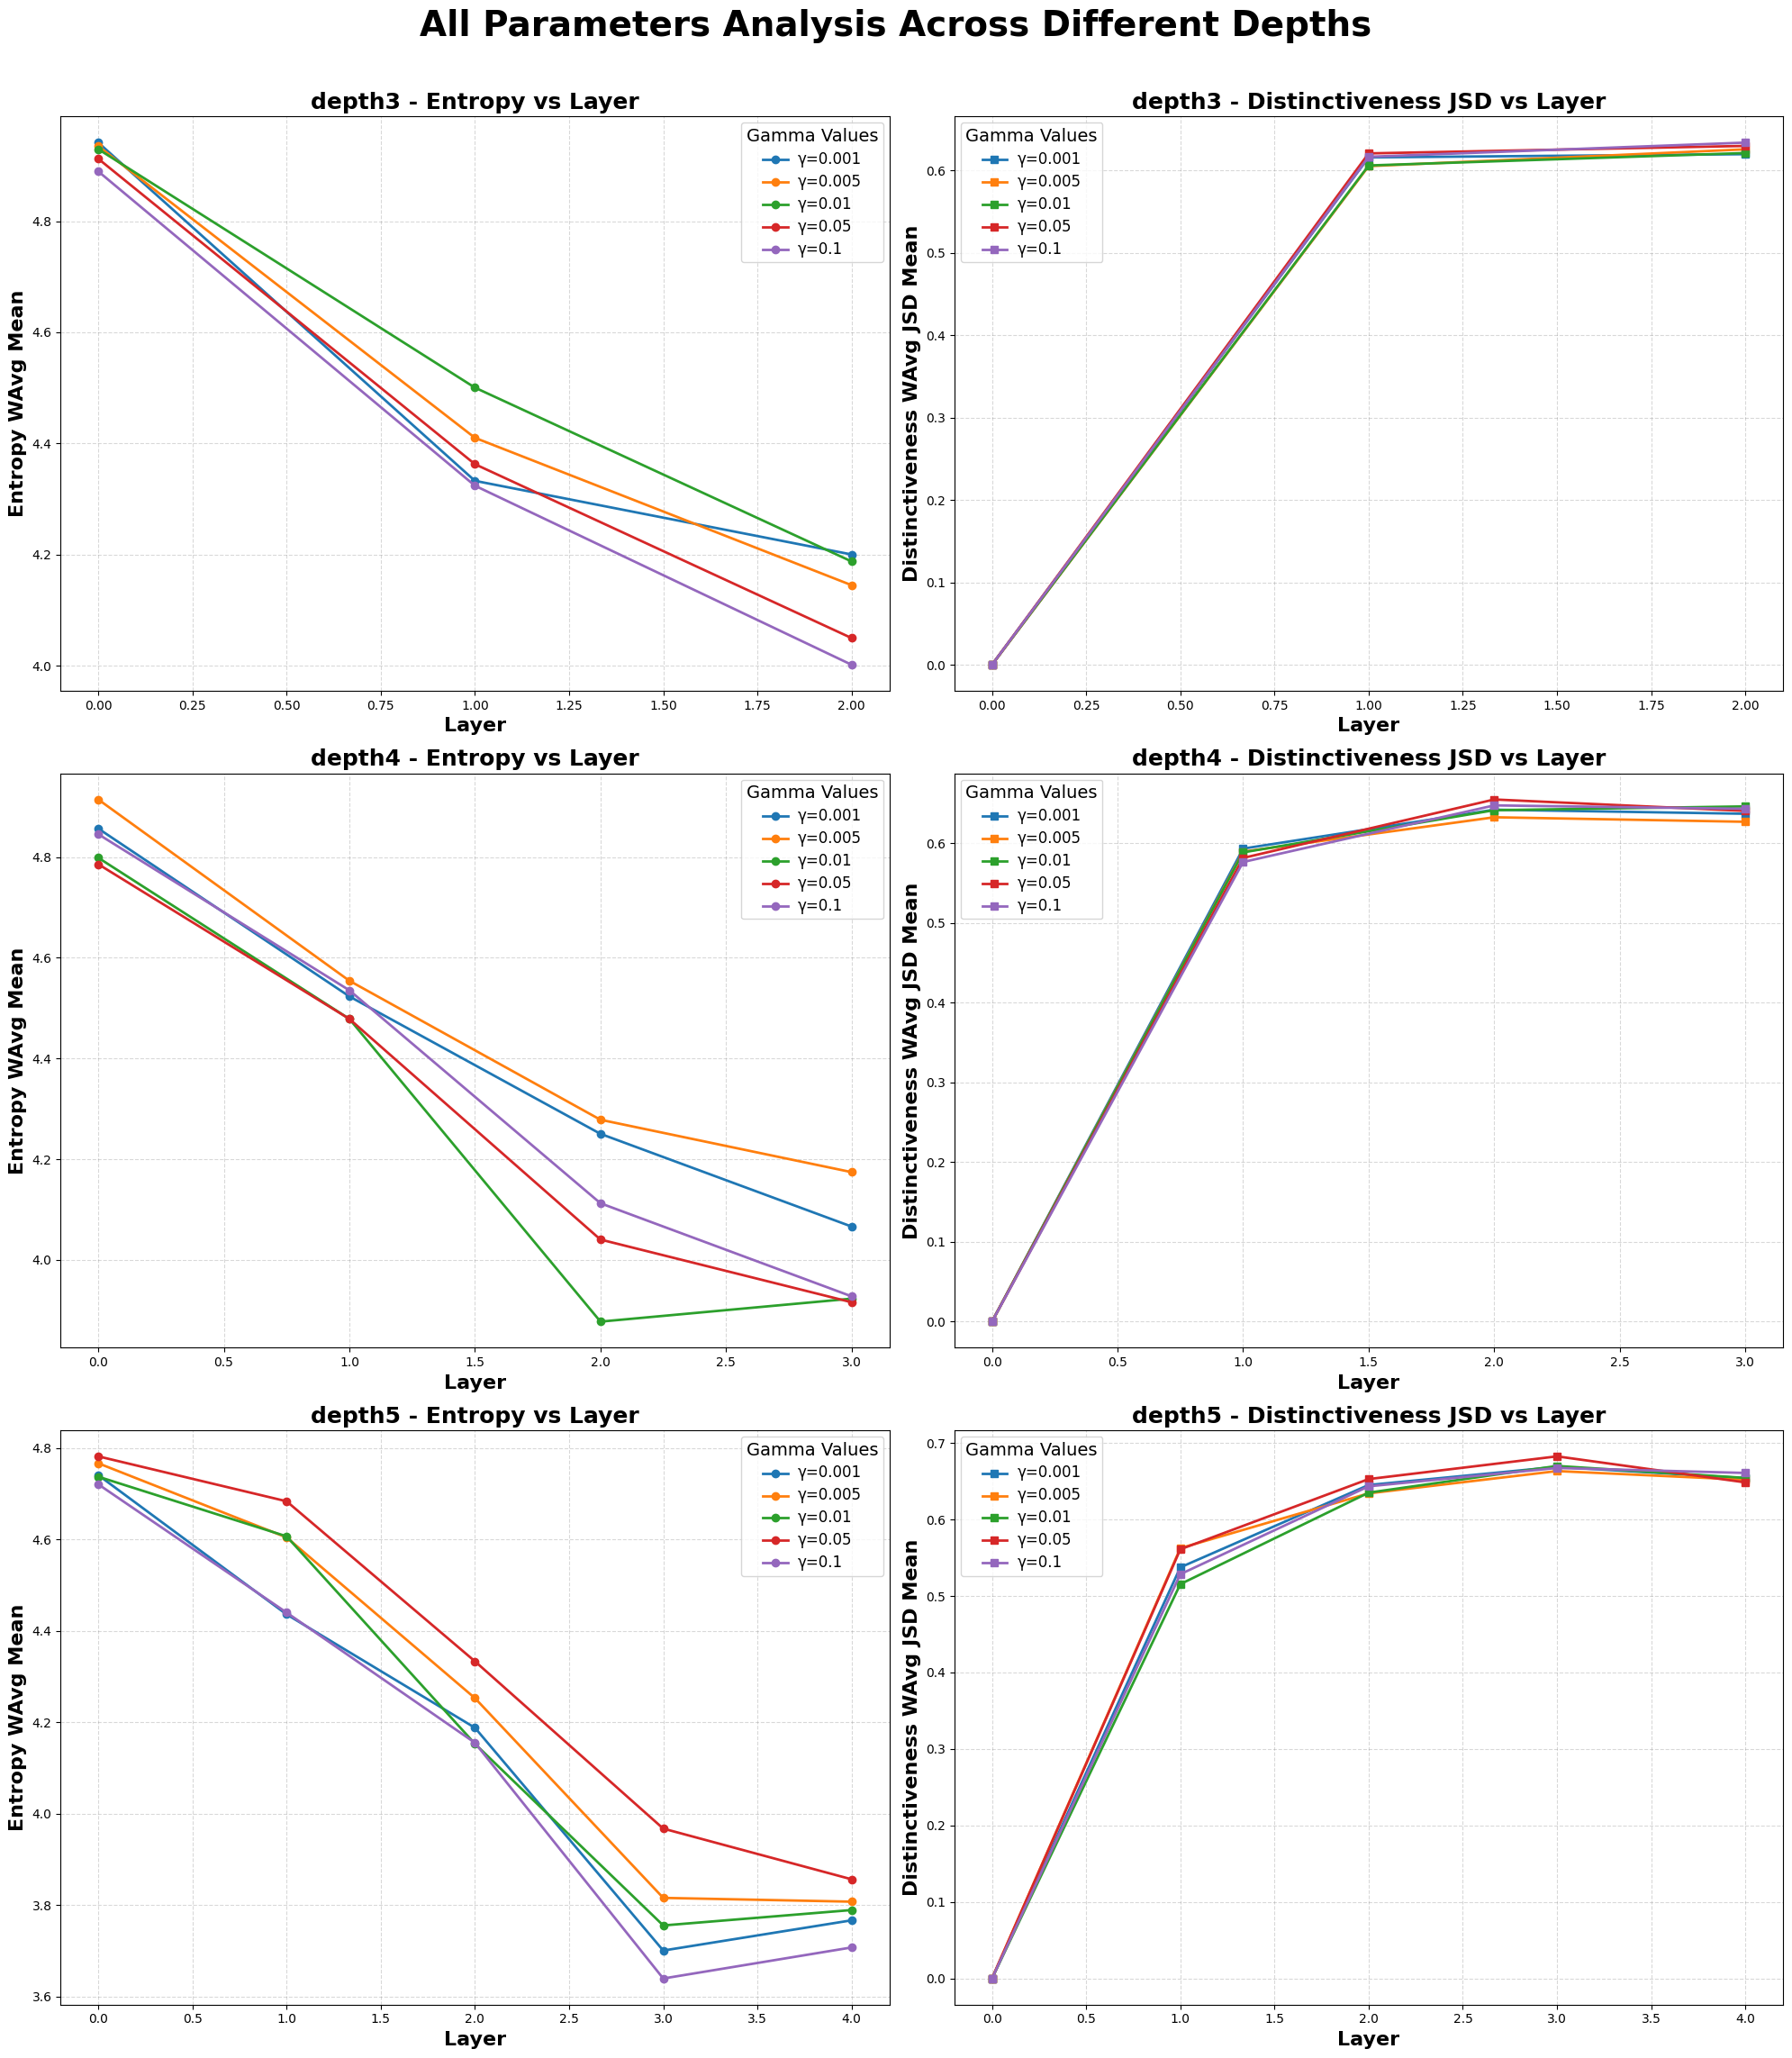


All params analysis completed!

Gamma values comparison across depths (all_params):
depth3: [0.001, 0.005, 0.01, 0.05, 0.1]
depth4: [0.001, 0.005, 0.01, 0.05, 0.1]
depth5: [0.001, 0.005, 0.01, 0.05, 0.1]


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

# Set font and plot style - 修改为浅色样式
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('default')  # 改为default样式

# 设置浅色背景和网格样式
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['axes.axisbelow'] = True

# Set working directory
base_path = Path("/Volumes/My Passport/收敛结果/step1")

def load_all_params_data(depth_folder):
    """Load and analyze all_params_layer_mean.csv from specific depth folder"""
    depth_path = base_path / depth_folder
    params_file = depth_path / "all_params_layer_mean.csv"
    
    if not params_file.exists():
        print(f"Warning: {params_file} does not exist")
        return None
    
    # Read data
    df = pd.read_csv(params_file)
    print(f"Loaded {depth_folder} all_params data, shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    
    return df

def plot_params_layer_analysis(df, depth_name, ax1, ax2):
    """Plot params-layer analysis on the provided axes."""
    # Get all unique gamma values
    gamma_values = sorted(df['gamma'].unique())
    
    # Create color mapping
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    # Plot 1: Entropy (左边)
    for i, gamma in enumerate(gamma_values):
        gamma_data = df[df['gamma'] == gamma]
        ax1.plot(gamma_data['layer'], gamma_data['entropy_wavg_mean'], 
                marker='o', linewidth=2, markersize=6, 
                color=colors[i % len(colors)], label=f'γ={gamma}')
    
    ax1.set_xlabel('Layer', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Entropy WAvg Mean', fontsize=16, fontweight='bold')
    ax1.set_title(f'{depth_name} - Entropy vs Layer', fontsize=18, fontweight='bold')
    ax1.set_facecolor('white')
    
    legend1 = ax1.legend(title='Gamma Values')
    legend1.get_title().set_fontsize(14)
    plt.setp(legend1.get_texts(), fontsize=12)
    ax1.grid(True, alpha=0.3, linestyle='--', color='gray')
    
    # Plot 2: Distinctiveness JSD (右边)
    for i, gamma in enumerate(gamma_values):
        gamma_data = df[df['gamma'] == gamma]
        ax2.plot(gamma_data['layer'], gamma_data['distinctiveness_wavg_jsd_mean'], 
                marker='s', linewidth=2, markersize=6, 
                color=colors[i % len(colors)], label=f'γ={gamma}')
    
    ax2.set_xlabel('Layer', fontsize=16, fontweight='bold')
    ax2.set_ylabel('Distinctiveness WAvg JSD Mean', fontsize=16, fontweight='bold')
    ax2.set_title(f'{depth_name} - Distinctiveness JSD vs Layer', fontsize=18, fontweight='bold')
    ax2.set_facecolor('white')
    
    legend2 = ax2.legend(title='Gamma Values')
    legend2.get_title().set_fontsize(14)
    plt.setp(legend2.get_texts(), fontsize=12)
    ax2.grid(True, alpha=0.3, linestyle='--', color='gray')

# Main analysis loop for all_params data
depth_folders = ['depth3', 'depth4', 'depth5']
all_params_data = {}

# --- 创建一个 3x2 的子图网格 ---
fig, axes = plt.subplots(3, 2, figsize=(20, 24), facecolor='white')
fig.suptitle('All Parameters Analysis Across Different Depths', fontsize=28, fontweight='bold')

print("Starting analysis of all_params_layer_mean.csv in step1 folder...")
print("="*60)

for i, depth_folder in enumerate(depth_folders):
    print(f"\nProcessing {depth_folder} all_params data...")
    
    # Load data
    df = load_all_params_data(depth_folder)
    
    if df is not None:
        all_params_data[depth_folder] = df
        
        # Display basic data information
        print(f"\n{depth_folder} all_params data overview:")
        print(f"Gamma range: {df['gamma'].min()} - {df['gamma'].max()}")
        print(f"Layer range: {df['layer'].min()} - {df['layer'].max()}")
        print(f"Entropy range: {df['entropy_wavg_mean'].min():.4f} - {df['entropy_wavg_mean'].max():.4f}")
        print(f"Distinctiveness JSD range: {df['distinctiveness_wavg_jsd_mean'].min():.4f} - {df['distinctiveness_wavg_jsd_mean'].max():.4f}")
        
        # 获取当前行的左右两个子图
        ax_left = axes[i, 0]
        ax_right = axes[i, 1]
        
        # 在指定的子图上绘图
        plot_params_layer_analysis(df, depth_folder, ax_left, ax_right)
    else:
        print(f"Skipping {depth_folder}, all_params data file does not exist")
        # 如果某个文件不存在，隐藏对应的子图
        axes[i, 0].set_visible(False)
        axes[i, 1].set_visible(False)

# 调整整体布局
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# 保存整个大图
output_path = base_path / "combined_all_params_layer_analysis.png"
fig.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"\nCombined plot saved to: {output_path}")

# 显示整个大图
plt.show()

print("\n" + "="*60)
print("All params analysis completed!")

# Display gamma values comparison across all depths for all_params data
if all_params_data:
    print("\nGamma values comparison across depths (all_params):")
    for depth, df in all_params_data.items():
        gamma_values = sorted(df['gamma'].unique())
        print(f"{depth}: {gamma_values}")

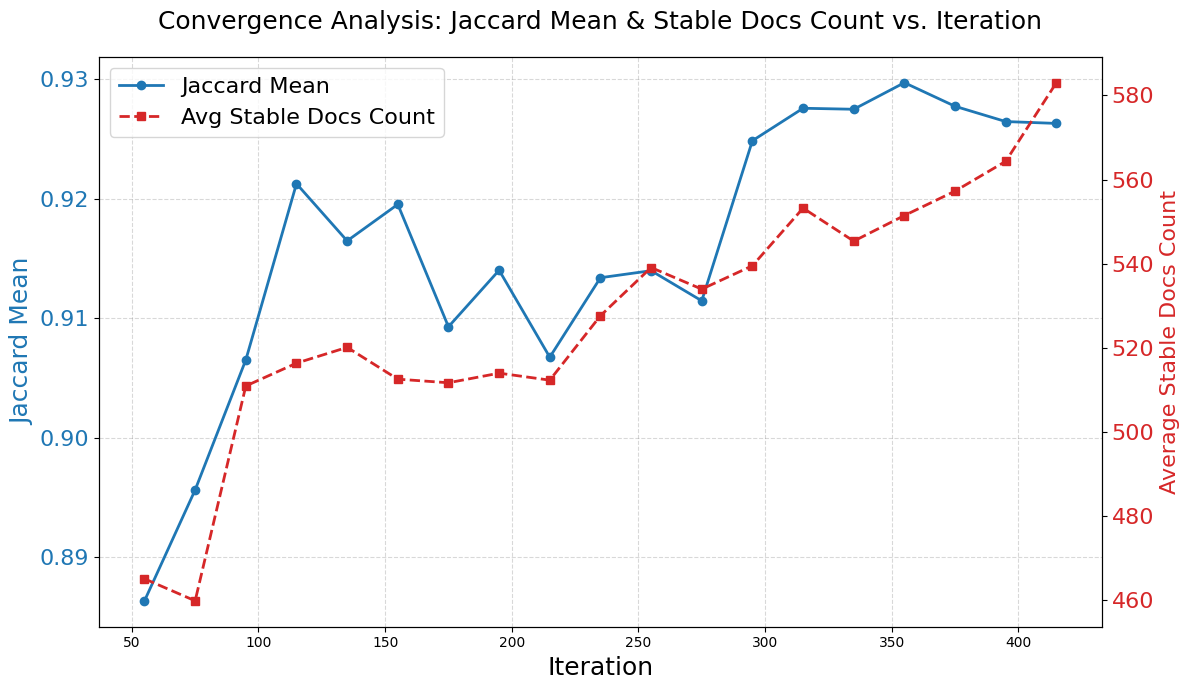

图表已保存到: /Volumes/My Passport/收敛结果/step1/depth5/d5_g0001_收敛/depth_5_gamma_0.001_run_1/convergence_plot.png


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
from pathlib import Path

# --- 绘图风格设置 (与单元格1保持一致) ---
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['axes.axisbelow'] = True
# --- 绘图风格设置结束 ---


# 1. 加载数据
file_path = Path("/Volumes/My Passport/收敛结果/step1/depth5/d5_g0001_收敛/depth_5_gamma_0.001_run_1/chain_convergence_info.csv")
if not file_path.exists():
    print(f"错误: 文件未找到于 {file_path}")
else:
    df = pd.read_csv(file_path)

    # 2. 数据处理
    # 计算迭代轮次
    df['iteration'] = df['record_time'] * 20 + 55
    
    # 解析 'len_stable_docs' 字符串列表并计算平均值
    # 使用 ast.literal_eval 安全地将字符串转换为列表
    df['len_stable_docs_mean'] = df['len_stable_docs'].apply(lambda x: np.mean(ast.literal_eval(x)))

    # 3. 绘图
    fig, ax1 = plt.subplots(figsize=(12, 7))
    fig.patch.set_facecolor('white')

    # 定义颜色
    color1 = '#1f77b4' # 蓝色
    color2 = '#d62728' # 红色

    # 绘制左侧Y轴 (Jaccard Mean)
    ax1.set_xlabel('Iteration', fontsize=18)
    ax1.set_ylabel('Jaccard Mean', color=color1, fontsize=18)
    line1 = ax1.plot(df['iteration'], df['jaccard_mean'], color=color1, marker='o', linestyle='-', linewidth=2, markersize=6, label='Jaccard Mean')
    ax1.tick_params(axis='y', labelcolor=color1, labelsize=16)
    ax1.grid(True, alpha=0.3, linestyle='--', color='gray')

    # 创建共享X轴的右侧Y轴
    ax2 = ax1.twinx()
    ax2.set_ylabel('Average Stable Docs Count', color=color2, fontsize=16)
    line2 = ax2.plot(df['iteration'], df['len_stable_docs_mean'], color=color2, marker='s', linestyle='--', linewidth=2, markersize=6, label='Avg Stable Docs Count')
    ax2.tick_params(axis='y', labelcolor=color2, labelsize=16)

    # 设置标题和图例
    plt.title('Convergence Analysis: Jaccard Mean & Stable Docs Count vs. Iteration', fontsize=18, pad=20)
    
    # 合并图例
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left', fontsize=16)

    plt.tight_layout()
    plt.show()

    # 保存图像
    output_path = file_path.parent / "convergence_plot.png"
    fig.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"图表已保存到: {output_path}")

正在加载数据...
正在构建词汇表...
词汇表构建完成，总词语数 (V): 1490
将分析最后 10 轮: [81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


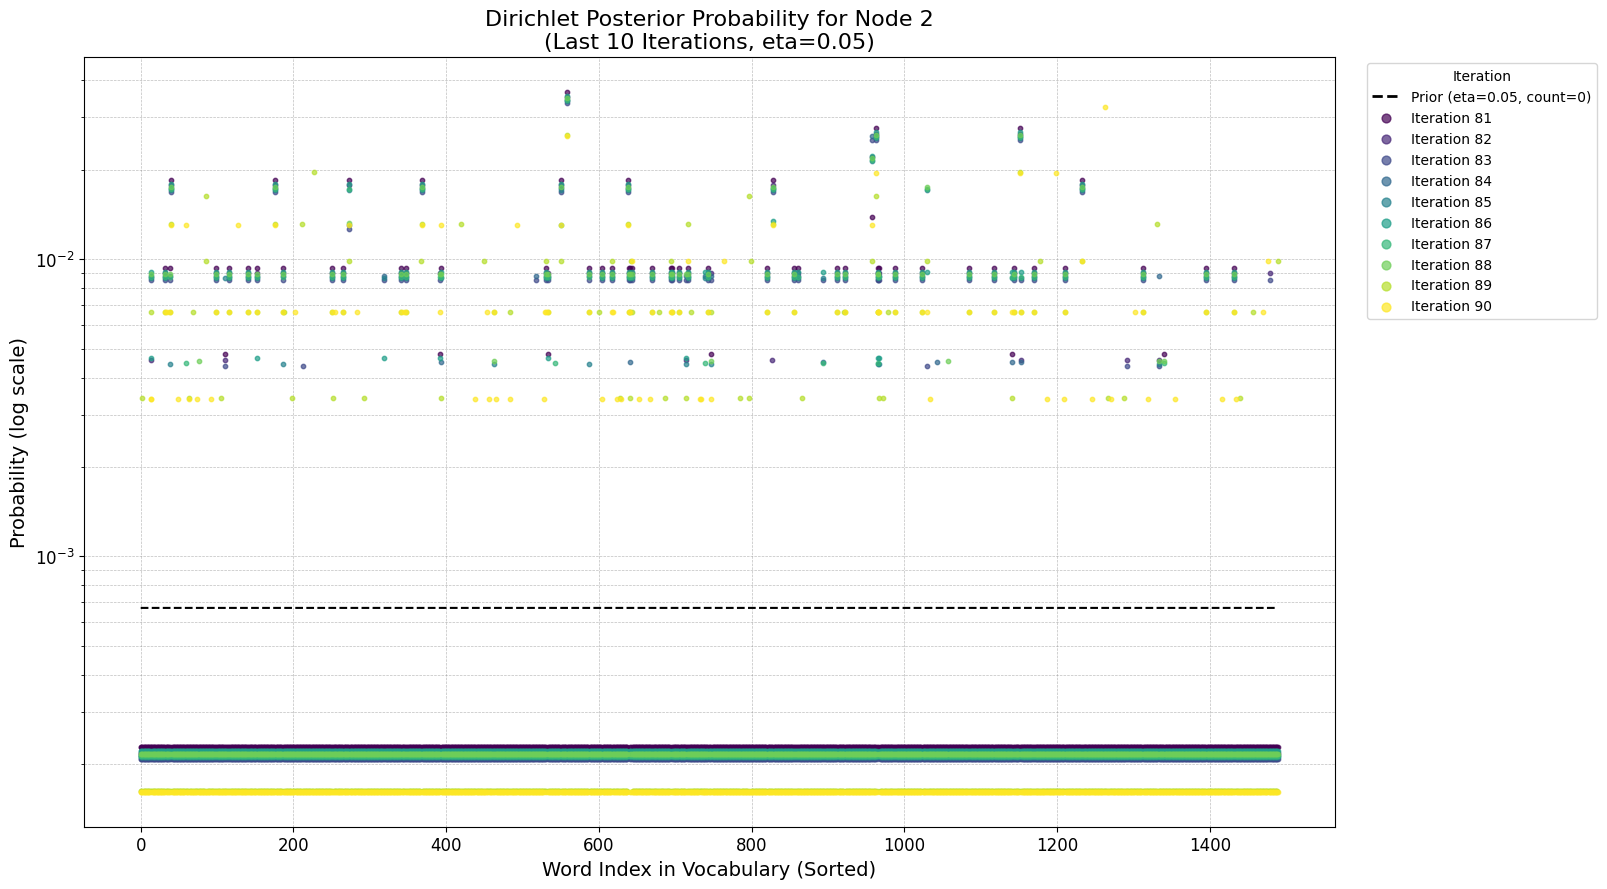

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# --- 绘图风格设置 ---
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['axes.axisbelow'] = True
# --- 绘图风格设置结束 ---

# 1. 定义参数和文件路径
file_path = Path("/Volumes/My Passport/收敛结果/step3/step3_d3_g005_e005_a01/depth_3_gamma_0.05_eta_0.05_alpha_0.1_run_3/iteration_node_word_distributions.csv")
eta = 0.05
node_to_analyze = 2
num_last_iterations = 10

if not file_path.exists():
    print(f"错误: 文件未找到于 {file_path}")
else:
    # 2. 加载数据并构建词汇表
    print("正在加载数据...")
    df = pd.read_csv(file_path)
    
    print("正在构建词汇表...")
    vocabulary = sorted(df['word'].unique())
    V = len(vocabulary)
    word_to_idx = {word: i for i, word in enumerate(vocabulary)}
    print(f"词汇表构建完成，总词语数 (V): {V}")

    # 3. 筛选所需数据
    df_node = df[df['node_id'] == node_to_analyze].copy()
    
    if df_node.empty:
        print(f"错误: 在数据中未找到 node_id = {node_to_analyze} 的记录。")
    else:
        last_iterations = sorted(df_node['iteration'].unique())[-num_last_iterations:]
        print(f"将分析最后 {num_last_iterations} 轮: {last_iterations}")
        
        df_filtered = df_node[df_node['iteration'].isin(last_iterations)]

        # 4. 准备绘图
        fig, ax = plt.subplots(figsize=(18, 9))
        fig.patch.set_facecolor('white')
        
        # 5. 绘制基准线 (Dirichlet先验)
        # 当所有count=0时, N=0, 后验概率 = (0+eta)/(0+eta*V) = 1/V
        prior_prob = 1 / V
        ax.plot(range(V), [prior_prob] * V, color='black', linestyle='--', linewidth=1.5, label=f'Prior (eta={eta}, count=0)')

        # 6. 计算并绘制每一轮的后验概率
        # 使用 'tab10' colormap 生成高区分度的颜色
        # colors = plt.cm.tab10.colors
        colors = plt.cm.viridis(np.linspace(0, 1, num_last_iterations))

        for i, iter_id in enumerate(last_iterations):
            iter_data = df_filtered[df_filtered['iteration'] == iter_id]
            
            # 计算该轮次下该节点的总词数 N
            N = iter_data['count'].sum()
            
            # 初始化该轮的概率向量 (大小为整个词汇表)
            # 初始值为eta / (N + eta*V)，对应词汇表中未在该节点出现的词
            base_prob = eta / (N + eta * V)
            posterior_probs = np.full(V, base_prob)
            
            # 更新在该节点出现的词的后验概率
            for _, row in iter_data.iterrows():
                idx = word_to_idx[row['word']]
                count = row['count']
                posterior_probs[idx] = (count + eta) / (N + eta * V)
            
            # 绘制该轮的概率点图
            ax.scatter(range(V), posterior_probs, label=f'Iteration {iter_id}', color=colors[i % len(colors)], alpha=0.7, s=10)

        # 7. 设置图表样式
        ax.set_yscale('log') # 使用对数坐标轴以便观察小概率
        ax.set_xlabel('Word Index in Vocabulary (Sorted)', fontsize=14)
        ax.set_ylabel('Probability (log scale)', fontsize=14)
        ax.set_title(f'Dirichlet Posterior Probability for Node {node_to_analyze}\n(Last {num_last_iterations} Iterations, eta={eta})', fontsize=16)
        
        # 创建一个更清晰的图例
        legend = ax.legend(title='Iteration', bbox_to_anchor=(1.02, 1), loc='upper left', markerscale=2)
        # 确保图例中的基准线也显示
        legend.get_lines()[0].set_linewidth(2)

        ax.grid(True, which="both", ls="--", linewidth=0.5, color='gray', alpha=0.5)
        ax.tick_params(axis='both', which='major', labelsize=12)
        
        plt.tight_layout(rect=[0, 0, 0.9, 1]) # 调整布局为图例留出空间
        plt.show()

        # # 保存图像
        # output_path = file_path.parent / f"dirichlet_posterior_node_{node_to_analyze}.png"
        # fig.savefig(output_path, dpi=300, bbox_inches='tight')
        # print(f"图表已保存到: {output_path}")

正在加载数据...
正在构建词汇表...
词汇表构建完成，总词语数 (V): 1490
将分析最后 10 轮: [81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


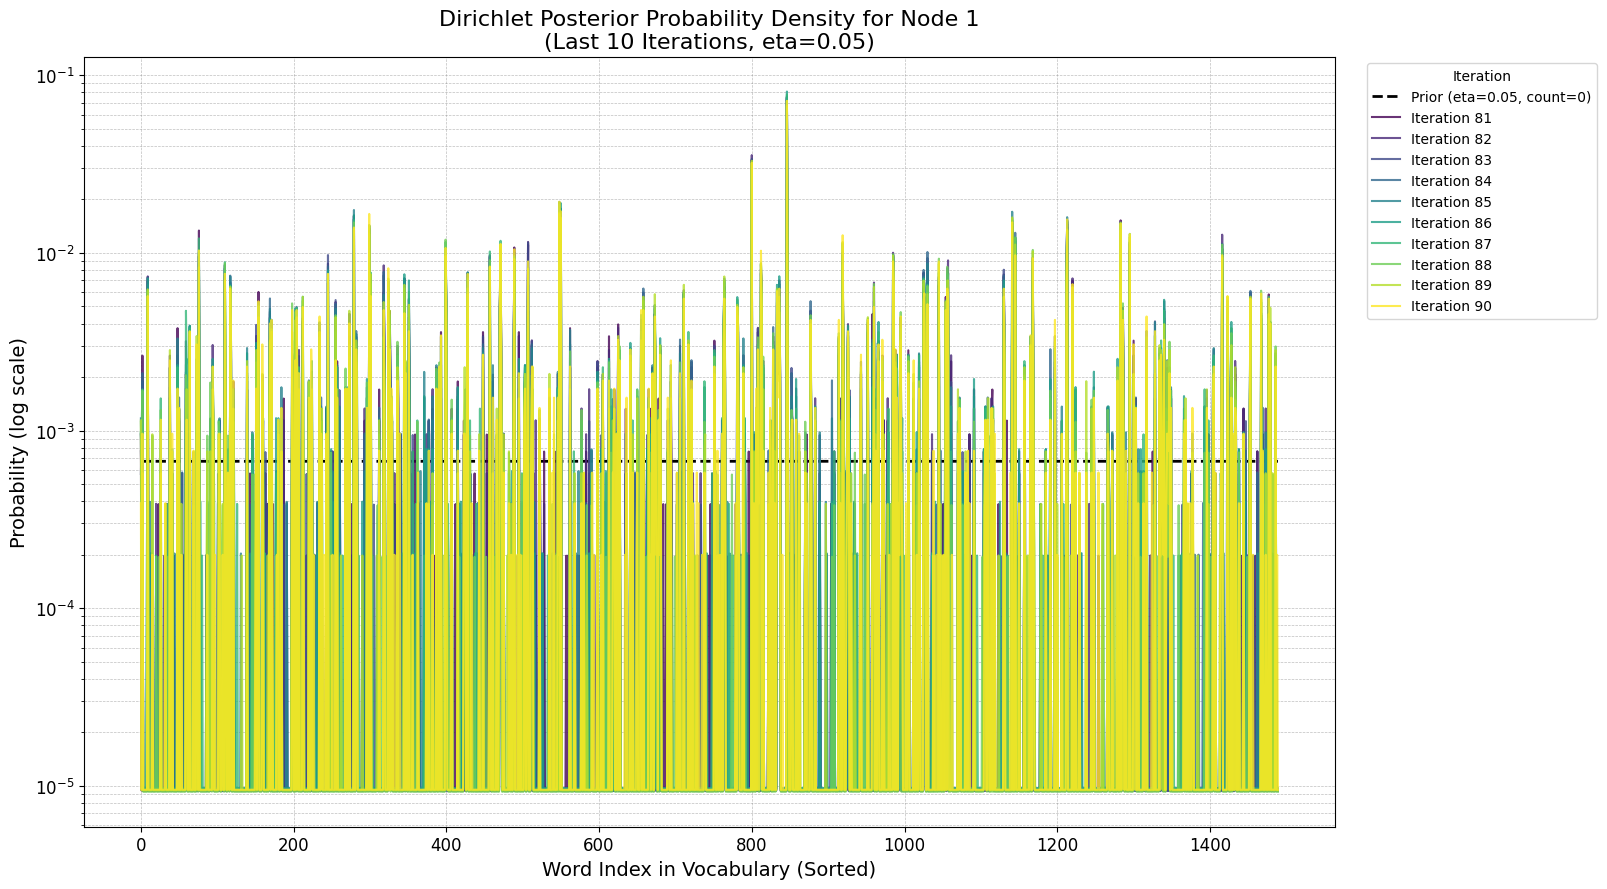

图表已保存到: /Volumes/My Passport/收敛结果/step3/step3_d3_g005_e005_a01/depth_3_gamma_0.05_eta_0.05_alpha_0.1_run_3/dirichlet_posterior_node_1.png


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# --- 绘图风格设置 ---
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['axes.axisbelow'] = True
# --- 绘图风格设置结束 ---

# 1. 定义参数和文件路径
file_path = Path("/Volumes/My Passport/收敛结果/step3/step3_d3_g005_e005_a01/depth_3_gamma_0.05_eta_0.05_alpha_0.1_run_3/iteration_node_word_distributions.csv")
eta = 0.05
node_to_analyze = 1
num_last_iterations = 10

if not file_path.exists():
    print(f"错误: 文件未找到于 {file_path}")
else:
    # 2. 加载数据并构建词汇表
    print("正在加载数据...")
    df = pd.read_csv(file_path)
    
    print("正在构建词汇表...")
    vocabulary = sorted(df['word'].unique())
    V = len(vocabulary)
    word_to_idx = {word: i for i, word in enumerate(vocabulary)}
    print(f"词汇表构建完成，总词语数 (V): {V}")

    # 3. 筛选所需数据
    df_node = df[df['node_id'] == node_to_analyze].copy()
    
    if df_node.empty:
        print(f"错误: 在数据中未找到 node_id = {node_to_analyze} 的记录。")
    else:
        last_iterations = sorted(df_node['iteration'].unique())[-num_last_iterations:]
        print(f"将分析最后 {num_last_iterations} 轮: {last_iterations}")
        
        df_filtered = df_node[df_node['iteration'].isin(last_iterations)]

        # 4. 准备绘图
        fig, ax = plt.subplots(figsize=(18, 9))
        fig.patch.set_facecolor('white')
        
        # 5. 绘制基准线 (Dirichlet先验)
        # 当所有count=0时, N=0, 后验概率 = (0+eta)/(0+eta*V) = 1/V
        prior_prob = 1 / V
        ax.plot(range(V), [prior_prob] * V, color='black', linestyle='--', linewidth=2, label=f'Prior (eta={eta}, count=0)')

        # 6. 计算并绘制每一轮的后验概率
        # 使用 'viridis' colormap 生成区分度高的颜色
        colors = plt.cm.viridis(np.linspace(0, 1, num_last_iterations))

        for i, iter_id in enumerate(last_iterations):
            iter_data = df_filtered[df_filtered['iteration'] == iter_id]
            
            # 计算该轮次下该节点的总词数 N
            N = iter_data['count'].sum()
            
            # 初始化该轮的概率向量 (大小为整个词汇表)
            # 初始值为eta / (N + eta*V)，对应词汇表中未在该节点出现的词
            base_prob = eta / (N + eta * V)
            posterior_probs = np.full(V, base_prob)
            
            # 更新在该节点出现的词的后验概率
            for _, row in iter_data.iterrows():
                idx = word_to_idx[row['word']]
                count = row['count']
                posterior_probs[idx] = (count + eta) / (N + eta * V)
            
            # 绘制该轮的概率密度线
            ax.plot(range(V), posterior_probs, label=f'Iteration {iter_id}', color=colors[i], alpha=0.8)

        # 7. 设置图表样式
        ax.set_yscale('log') # 使用对数坐标轴以便观察小概率
        ax.set_xlabel('Word Index in Vocabulary (Sorted)', fontsize=14)
        ax.set_ylabel('Probability (log scale)', fontsize=14)
        ax.set_title(f'Dirichlet Posterior Probability Density for Node {node_to_analyze}\n(Last {num_last_iterations} Iterations, eta={eta})', fontsize=16)
        ax.legend(title='Iteration', bbox_to_anchor=(1.02, 1), loc='upper left')
        ax.grid(True, which="both", ls="--", linewidth=0.5, color='gray', alpha=0.5)
        ax.tick_params(axis='both', which='major', labelsize=12)
        
        plt.tight_layout(rect=[0, 0, 0.9, 1]) # 调整布局为图例留出空间
        plt.show()

        # 保存图像
        output_path = file_path.parent / f"dirichlet_posterior_node_{node_to_analyze}.png"
        fig.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"图表已保存到: {output_path}")

找到了 6 个 run_3 的文件，并已按 gamma 值排序。

正在处理文件: /Volumes/My Passport/收敛结果/step1/depth3/d3_g0001_2条链收敛/depth_3_gamma_0.001_run_3/result_nodes.csv


/var/folders/v5/6mdkg5713kxgwg5xs24g8rvr0000gn/T/ipykernel_28878/3998885598.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='layer', y='total_words', data=df, palette=custom_palette, inner="quartile", cut=0, ax=ax)
/var/folders/v5/6mdkg5713kxgwg5xs24g8rvr0000gn/T/ipykernel_28878/3998885598.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='layer', y='total_words', data=df, palette=custom_palette, inner="quartile", cut=0, ax=ax)



正在处理文件: /Volumes/My Passport/收敛结果/step1/depth3/d3_g0001_收敛/depth_3_gamma_0.001_run_3/result_nodes.csv

正在处理文件: /Volumes/My Passport/收敛结果/step1/depth3/d3_g0005_收敛/depth_3_gamma_0.005_run_3/result_nodes.csv


/var/folders/v5/6mdkg5713kxgwg5xs24g8rvr0000gn/T/ipykernel_28878/3998885598.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='layer', y='total_words', data=df, palette=custom_palette, inner="quartile", cut=0, ax=ax)
/var/folders/v5/6mdkg5713kxgwg5xs24g8rvr0000gn/T/ipykernel_28878/3998885598.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='layer', y='total_words', data=df, palette=custom_palette, inner="quartile", cut=0, ax=ax)



正在处理文件: /Volumes/My Passport/收敛结果/step1/depth3/d3_g001_收敛/depth_3_gamma_0.01_run_3/result_nodes.csv

正在处理文件: /Volumes/My Passport/收敛结果/step1/depth3/d3_g005_收敛/depth_3_gamma_0.05_run_3/result_nodes.csv


/var/folders/v5/6mdkg5713kxgwg5xs24g8rvr0000gn/T/ipykernel_28878/3998885598.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='layer', y='total_words', data=df, palette=custom_palette, inner="quartile", cut=0, ax=ax)
/var/folders/v5/6mdkg5713kxgwg5xs24g8rvr0000gn/T/ipykernel_28878/3998885598.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='layer', y='total_words', data=df, palette=custom_palette, inner="quartile", cut=0, ax=ax)



正在处理文件: /Volumes/My Passport/收敛结果/step1/depth3/d3_g01_收敛/depth_3_gamma_0.1_run_3/result_nodes.csv

所有图表已合并并保存到: /Volumes/My Passport/收敛结果/output_fig/d3_all_gamma_words_violinplot_grid.png


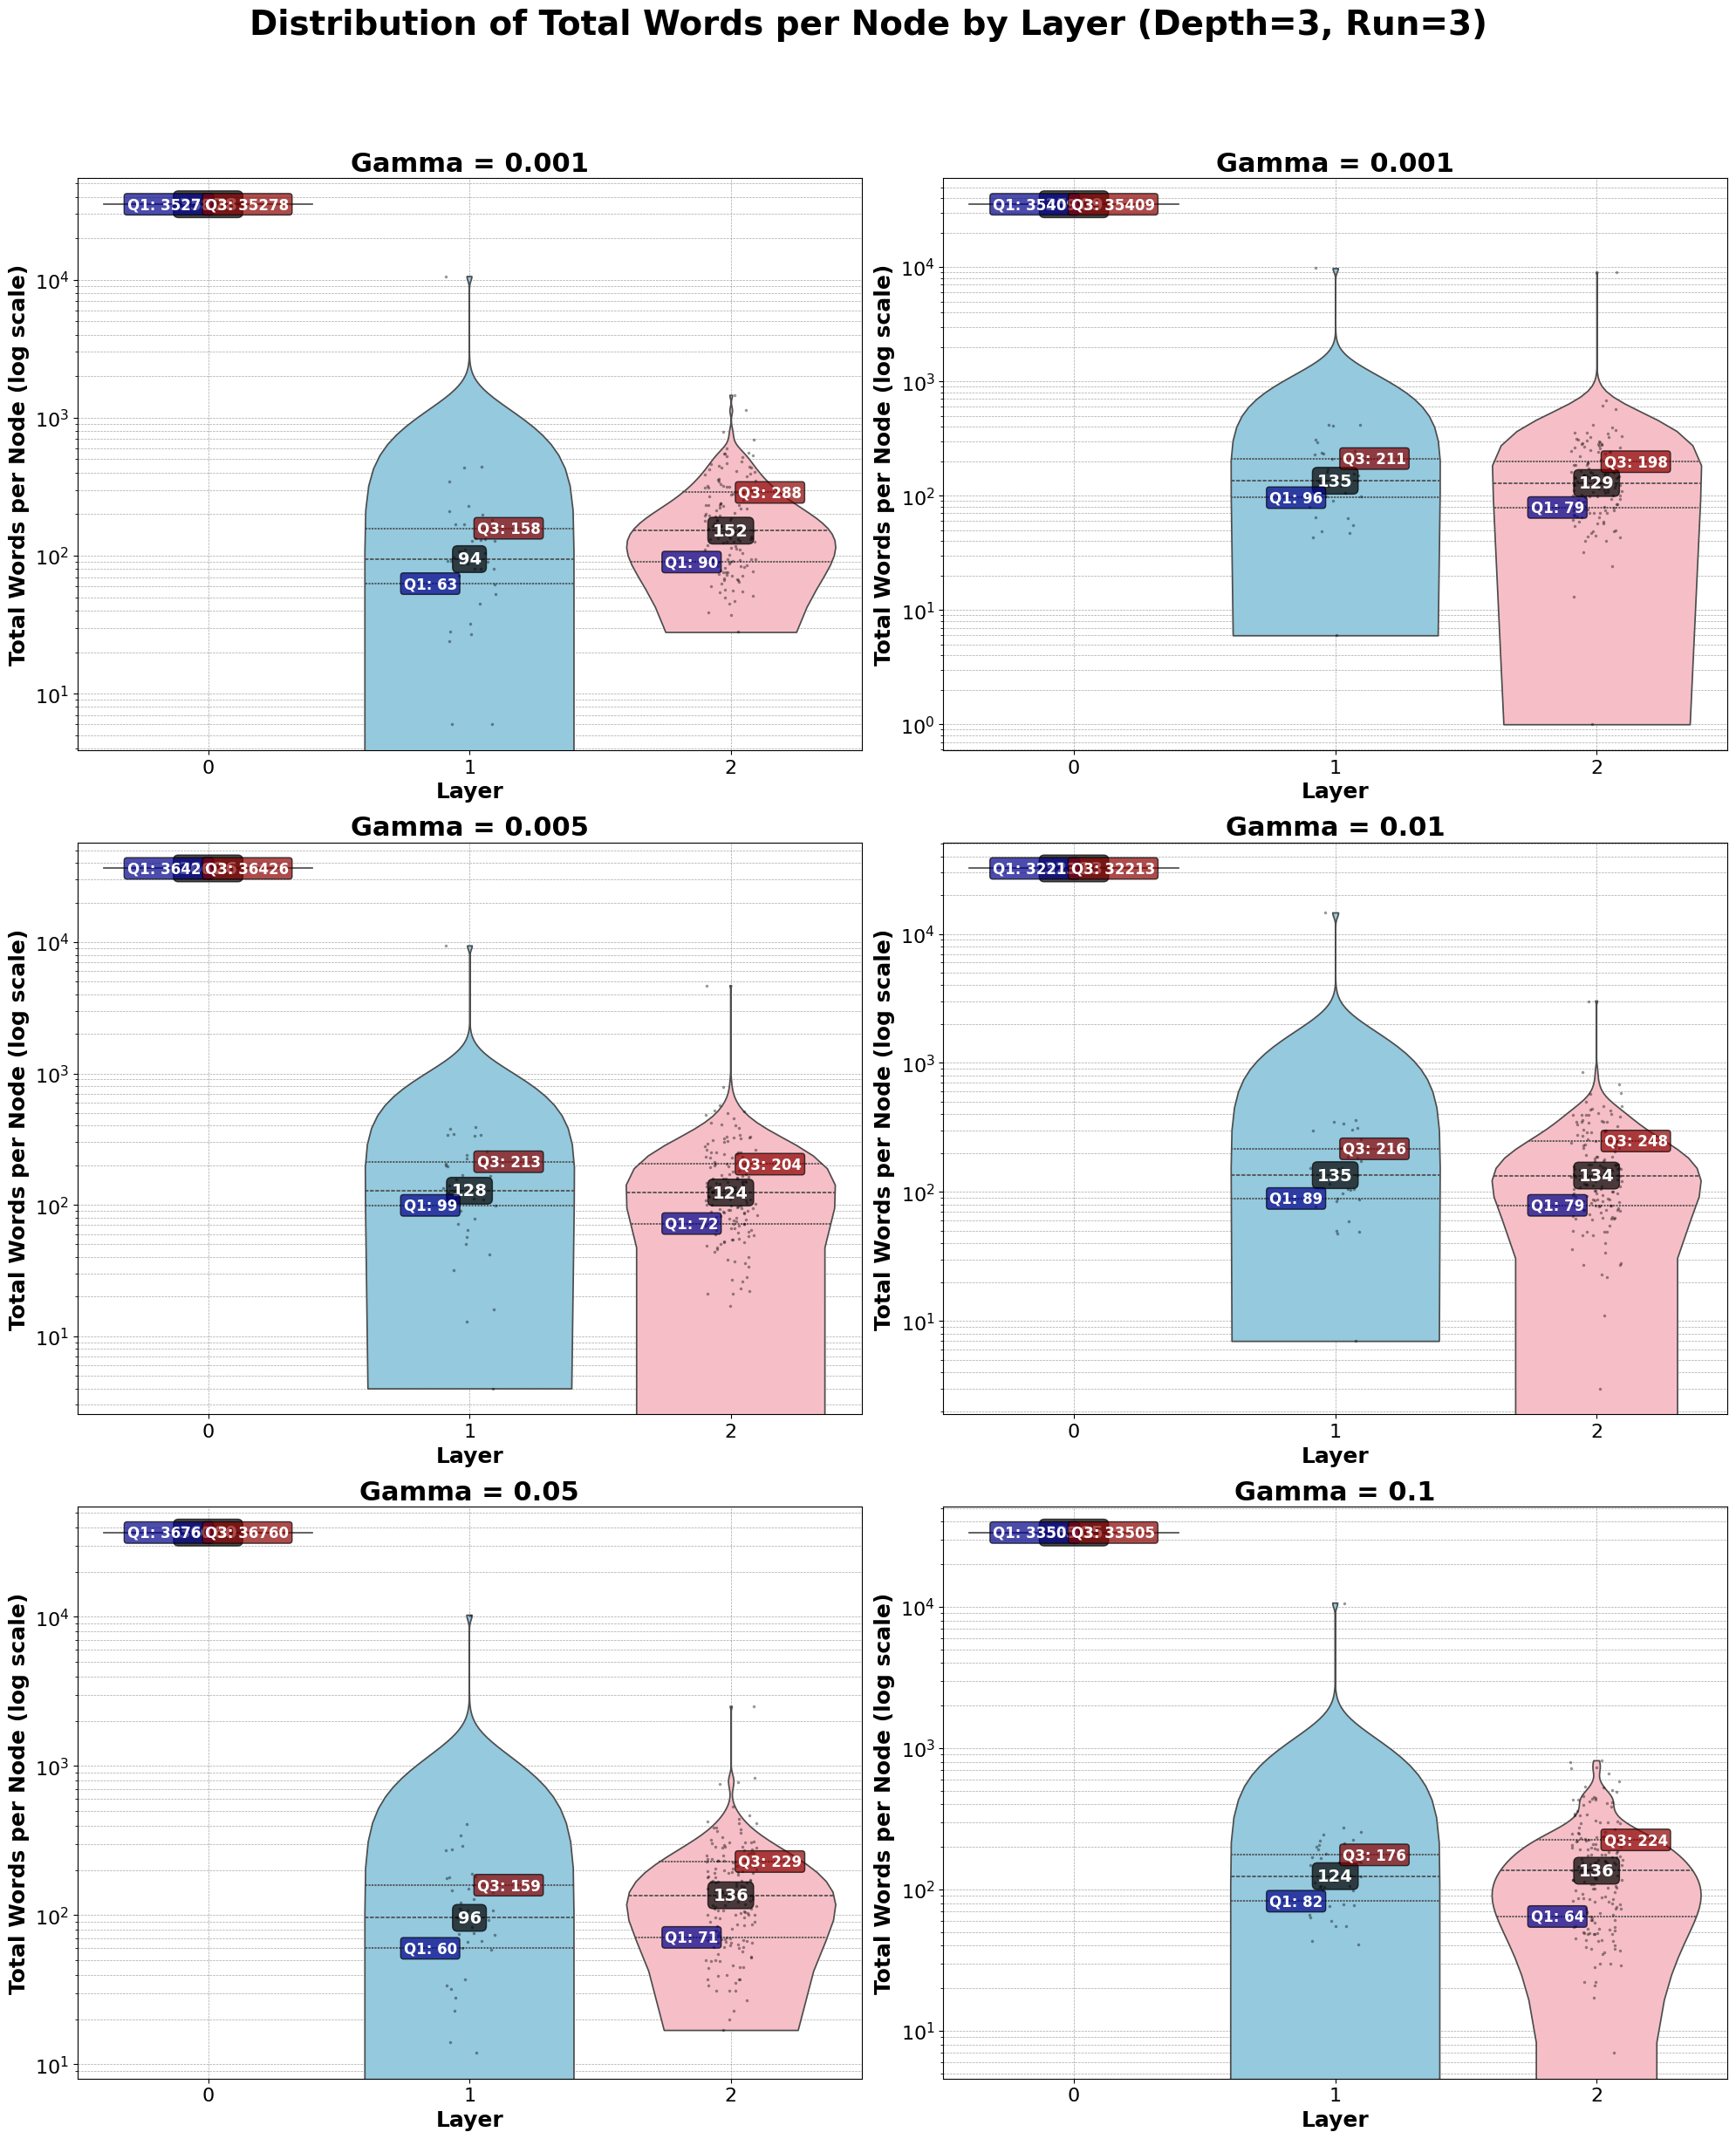

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re

# --- 绘图风格设置 ---
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['axes.axisbelow'] = True
# --- 绘图风格设置结束 ---

# 1. 定义基础路径和输出路径
base_path = Path("/Volumes/My Passport/收敛结果/step1/depth3")
output_fig_path = Path("/Volumes/My Passport/收敛结果/output_fig")
output_fig_path.mkdir(exist_ok=True)

# 2. 查找所有 run_3 的 result_nodes.csv 文件
run_3_files = list(base_path.glob("**/depth_*_run_3/result_nodes.csv"))

# 定义一个函数从路径中提取gamma值用于排序
def extract_gamma_from_path(path):
    match = re.search(r'gamma_([\d.]+)_run', str(path))
    return float(match.group(1)) if match else float('inf')

# 按gamma值对文件列表进行排序
run_3_files.sort(key=extract_gamma_from_path)

print(f"找到了 {len(run_3_files)} 个 run_3 的文件，并已按 gamma 值排序。")

# 3. 创建一个 3x2 的子图网格
fig, axes = plt.subplots(3, 2, figsize=(20, 24))
axes = axes.flatten() # 将2D数组转换为1D，方便遍历

# 4. 遍历每个文件，在对应的子图上绘图
for i, file_path in enumerate(run_3_files):
    if i >= len(axes):
        print(f"警告: 文件数量 ({len(run_3_files)}) 超过子图数量 ({len(axes)})，多余的文件将被忽略。")
        break
        
    ax = axes[i]
    print(f"\n正在处理文件: {file_path}")
    
    try:
        # 只读取需要的列
        required_cols = ['layer', 'total_words', 'gamma']
        df = pd.read_csv(file_path, usecols=required_cols)

        # 数据清洗
        df['layer'] = pd.to_numeric(df['layer'], errors='coerce')
        df.dropna(subset=['layer'], inplace=True)
        df['layer'] = df['layer'].astype(int)

        # 提取 gamma 值用于图表标题
        gamma_value = "Unknown"
        if not df.empty and 'gamma' in df.columns:
            gamma_value = df['gamma'].iloc[0]
        
        # --- 修复：调色板的键改为字符串格式 ---
        custom_palette = {'0': 'grey', '1': 'skyblue', '2': 'lightpink'}

        # 使用 seaborn 创建小提琴图
        sns.violinplot(x='layer', y='total_words', data=df, palette=custom_palette, inner="quartile", cut=0, ax=ax)
        
        # 在小提琴图上叠加散点图
        sns.stripplot(x='layer', y='total_words', data=df, color='black', size=2.5, alpha=0.4, ax=ax)

        # --- 添加数值标注（统一格式，增大字体） ---
        for layer_num in sorted(df['layer'].unique()):
            layer_data = df[df['layer'] == layer_num]['total_words']
            if layer_data.empty:
                continue
            median = layer_data.median()
            q1 = layer_data.quantile(0.25)
            q3 = layer_data.quantile(0.75)
            
            # 中位数标注（中间位置）
            ax.text(layer_num, median, f'{median:.0f}', 
                    horizontalalignment='center', verticalalignment='center', 
                    fontsize=14, color='white', fontweight='bold',
                    bbox=dict(facecolor='black', alpha=0.7, boxstyle='round,pad=0.3'))
            
            # Q1标注（左下角）
            ax.text(layer_num - 0.15, q1, f'Q1: {q1:.0f}', 
                    horizontalalignment='center', verticalalignment='center', 
                    fontsize=12, color='white', fontweight='bold',
                    bbox=dict(facecolor='darkblue', alpha=0.7, boxstyle='round,pad=0.2'))
            
            # Q3标注（右上角）
            ax.text(layer_num + 0.15, q3, f'Q3: {q3:.0f}', 
                    horizontalalignment='center', verticalalignment='center', 
                    fontsize=12, color='white', fontweight='bold',
                    bbox=dict(facecolor='darkred', alpha=0.7, boxstyle='round,pad=0.2'))

        # 设置 Y 轴为对数尺度
        ax.set_yscale('log')
        
        # 设置图表标题和标签（增大字体）
        ax.set_title(f'Gamma = {gamma_value}', fontsize=22, fontweight='bold')
        ax.set_xlabel('Layer', fontsize=18, fontweight='bold')
        ax.set_ylabel('Total Words per Node (log scale)', fontsize=18, fontweight='bold')
        ax.tick_params(axis='both', which='major', labelsize=16)
        
        # 添加网格线
        ax.grid(True, which="both", ls="--", linewidth=0.5, color='gray', alpha=0.7)

    except Exception as e:
        print(f"处理文件 {file_path} 时出错: {e}")

# 为多余的子图设置为空白
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# 添加总标题并调整布局（增大字体）
fig.suptitle('Distribution of Total Words per Node by Layer (Depth=3, Run=3)', fontsize=28, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])

# 保存整个大图
output_filename = output_fig_path / "d3_all_gamma_words_violinplot_grid.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f"\n所有图表已合并并保存到: {output_filename}")

plt.show()

找到了 1 个 run_3 的文件，并已按 gamma 值排序。

正在处理文件: /Volumes/My Passport/收敛结果/step2/step2_d3_g005_e005_基于e01_第二次_收敛/depth_3_gamma_0.05_eta_0.05_run_3/result_nodes.csv


/var/folders/v5/6mdkg5713kxgwg5xs24g8rvr0000gn/T/ipykernel_43213/4242180291.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='layer', y='total_words', data=df, palette=custom_palette, inner="quartile", cut=0, ax=ax)



所有图表已合并并保存到: /Volumes/My Passport/收敛结果/output_fig/d3_e005_violinplot_grid.png


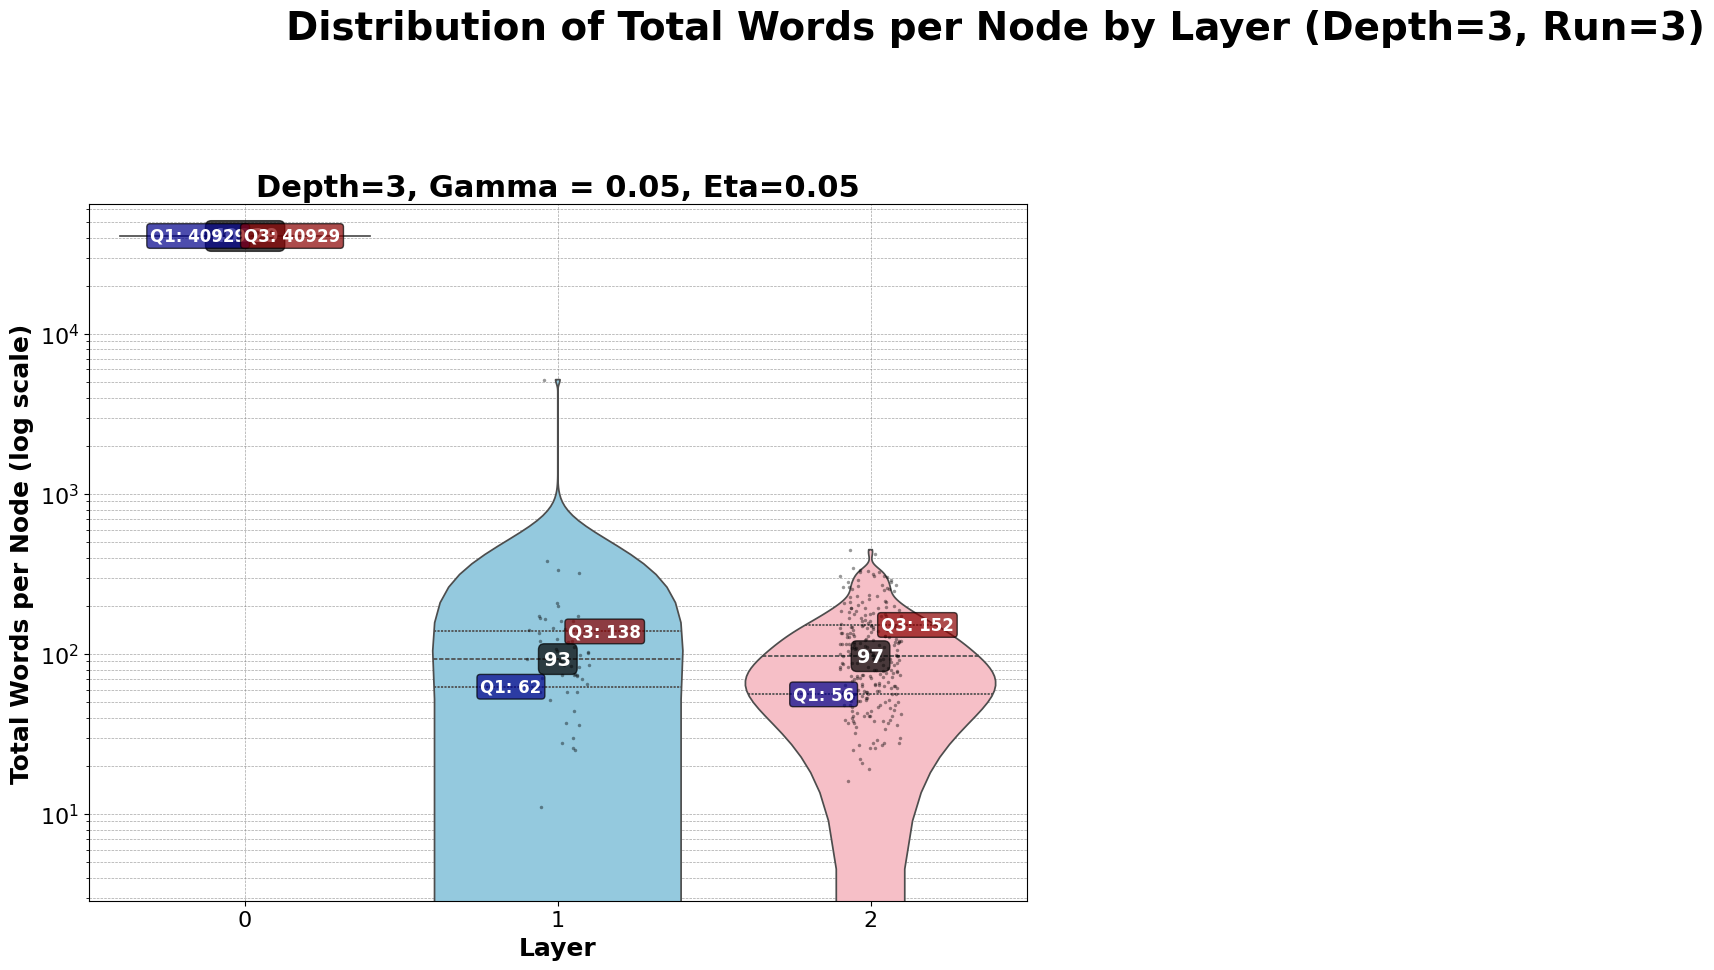

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re

# --- 绘图风格设置 ---
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['axes.axisbelow'] = True
# --- 绘图风格设置结束 ---

# 1. 定义基础路径和输出路径
base_path = Path("/Volumes/My Passport/收敛结果/step2/step2_d3_g005_e005_基于e01_第二次_收敛")
output_fig_path = Path("/Volumes/My Passport/收敛结果/output_fig")
output_fig_path.mkdir(exist_ok=True)

# 2. 查找所有 run_3 的 result_nodes.csv 文件
run_3_files = list(base_path.glob("**/depth_*_run_3/result_nodes.csv"))

# 定义一个函数从路径中提取gamma值用于排序
def extract_gamma_from_path(path):
    match = re.search(r'gamma_([\d.]+)_run', str(path))
    return float(match.group(1)) if match else float('inf')

# 按gamma值对文件列表进行排序
run_3_files.sort(key=extract_gamma_from_path)

print(f"找到了 {len(run_3_files)} 个 run_3 的文件，并已按 gamma 值排序。")

# 3. 创建一个 3x2 的子图网格
fig, axes = plt.subplots(3, 2, figsize=(20, 24))
axes = axes.flatten() # 将2D数组转换为1D，方便遍历

# 4. 遍历每个文件，在对应的子图上绘图
for i, file_path in enumerate(run_3_files):
    if i >= len(axes):
        print(f"警告: 文件数量 ({len(run_3_files)}) 超过子图数量 ({len(axes)})，多余的文件将被忽略。")
        break
        
    ax = axes[i]
    print(f"\n正在处理文件: {file_path}")
    
    try:
        # 只读取需要的列
        required_cols = ['layer', 'total_words', 'gamma']
        df = pd.read_csv(file_path, usecols=required_cols)

        # 数据清洗
        df['layer'] = pd.to_numeric(df['layer'], errors='coerce')
        df.dropna(subset=['layer'], inplace=True)
        df['layer'] = df['layer'].astype(int)

        # 提取 gamma 值用于图表标题
        gamma_value = "Unknown"
        if not df.empty and 'gamma' in df.columns:
            gamma_value = df['gamma'].iloc[0]
        
        # --- 修复：调色板的键改为字符串格式 ---
        custom_palette = {'0': 'grey', '1': 'skyblue', '2': 'lightpink'}

        # 使用 seaborn 创建小提琴图
        sns.violinplot(x='layer', y='total_words', data=df, palette=custom_palette, inner="quartile", cut=0, ax=ax)
        
        # 在小提琴图上叠加散点图
        sns.stripplot(x='layer', y='total_words', data=df, color='black', size=2.5, alpha=0.4, ax=ax)

        # --- 添加数值标注（统一格式，增大字体） ---
        for layer_num in sorted(df['layer'].unique()):
            layer_data = df[df['layer'] == layer_num]['total_words']
            if layer_data.empty:
                continue
            median = layer_data.median()
            q1 = layer_data.quantile(0.25)
            q3 = layer_data.quantile(0.75)
            
            # 中位数标注（中间位置）
            ax.text(layer_num, median, f'{median:.0f}', 
                    horizontalalignment='center', verticalalignment='center', 
                    fontsize=14, color='white', fontweight='bold',
                    bbox=dict(facecolor='black', alpha=0.7, boxstyle='round,pad=0.3'))
            
            # Q1标注（左下角）
            ax.text(layer_num - 0.15, q1, f'Q1: {q1:.0f}', 
                    horizontalalignment='center', verticalalignment='center', 
                    fontsize=12, color='white', fontweight='bold',
                    bbox=dict(facecolor='darkblue', alpha=0.7, boxstyle='round,pad=0.2'))
            
            # Q3标注（右上角）
            ax.text(layer_num + 0.15, q3, f'Q3: {q3:.0f}', 
                    horizontalalignment='center', verticalalignment='center', 
                    fontsize=12, color='white', fontweight='bold',
                    bbox=dict(facecolor='darkred', alpha=0.7, boxstyle='round,pad=0.2'))

        # 设置 Y 轴为对数尺度
        ax.set_yscale('log')
        
        # 设置图表标题和标签（增大字体）
        ax.set_title(f'Depth=3, Gamma = {gamma_value}, Eta=0.05', fontsize=22, fontweight='bold')
        ax.set_xlabel('Layer', fontsize=18, fontweight='bold')
        ax.set_ylabel('Total Words per Node (log scale)', fontsize=18, fontweight='bold')
        ax.tick_params(axis='both', which='major', labelsize=16)
        
        # 添加网格线
        ax.grid(True, which="both", ls="--", linewidth=0.5, color='gray', alpha=0.7)

    except Exception as e:
        print(f"处理文件 {file_path} 时出错: {e}")

# 为多余的子图设置为空白
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# 添加总标题并调整布局（增大字体）
fig.suptitle('Distribution of Total Words per Node by Layer (Depth=3, Run=3)', fontsize=28, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])

# 保存整个大图
output_filename = output_fig_path / "d3_e005_violinplot_grid.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f"\n所有图表已合并并保存到: {output_filename}")

plt.show()

所有数据文件加载成功。

原始指标数据:
       Perplexity    NPMI     C_V  JS Distance  Renyi Entropy    Gini
eta                                                                  
0.005    447.8291  0.0795  0.5768       0.7486         3.0128  0.4484
0.010    396.6156  0.0779  0.5720       0.7070         3.3435  0.4233
0.020    371.0158  0.0739  0.5680       0.6540         3.8342  0.4216
0.050    356.4995  0.0766  0.5701       0.5739         4.4826  0.3857
0.100    415.9169  0.0781  0.5648       0.4982         5.0438  0.4807
0.200    467.0780  0.0717  0.5869       0.4039         5.4501  0.5406

归一化后指标数据:
       Perplexity      NPMI       C_V  JS Distance  Renyi Entropy      Gini
eta                                                                        
0.005    0.825925  1.000000  0.542986     1.000000       0.000000  0.404777
0.010    0.362784  0.794872  0.325792     0.879315       0.135683  0.242737
0.020    0.131276  0.282051  0.144796     0.725558       0.337012  0.231762
0.050    0.000000  0.628205 

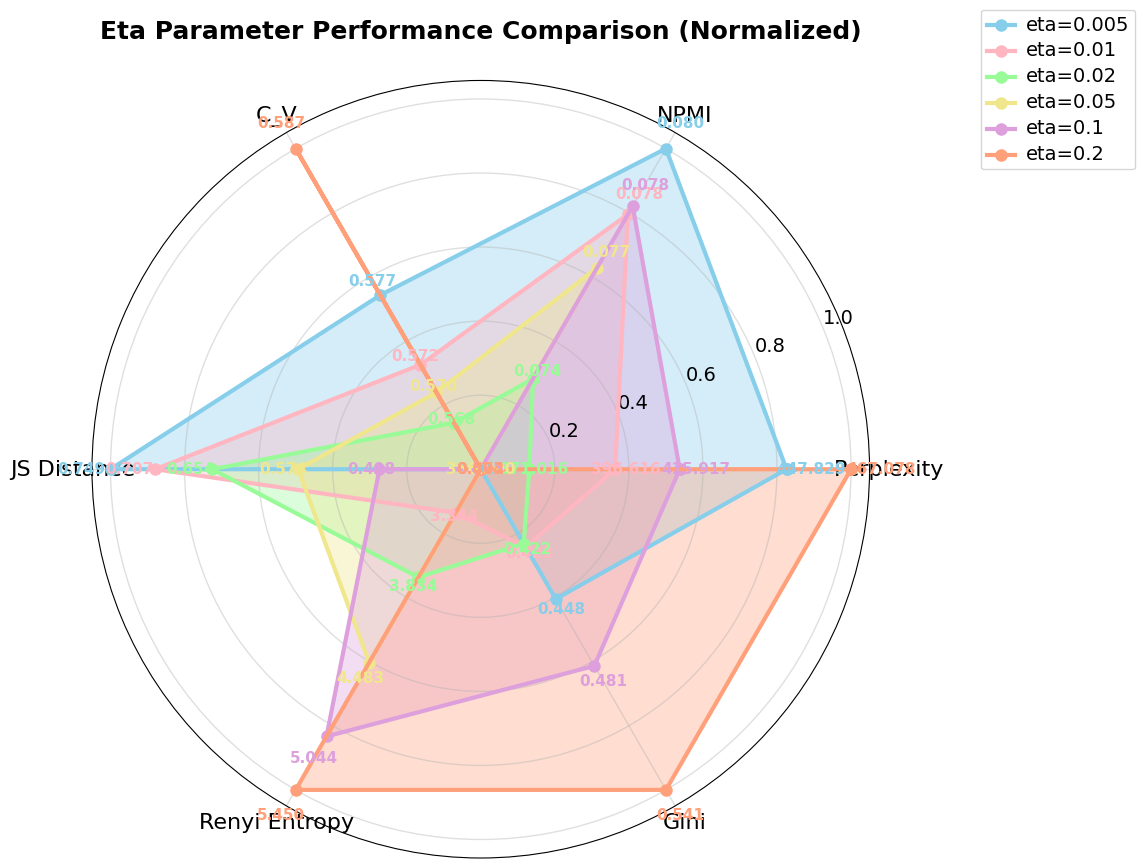

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

import matplotlib.pyplot as plt
import numpy as np
from math import pi

def create_radar_chart(data, categories, labels, title="Radar Chart", raw_data=None):
    """
    Create a radar chart with raw value annotations.
    
    Parameters:
    data: list of lists, each inner list contains NORMALIZED values for one series
    categories: list of category names (axes)
    labels: list of series labels
    title: chart title
    raw_data: list of lists, each inner list contains RAW values for annotation
    """
    
    # Number of variables
    N = len(categories)
    
    # Compute angle for each axis
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Complete the circle
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
    fig.patch.set_facecolor('white')
    
    # --- 修复：增加一种颜色以匹配6个eta值 ---
    colors = ['#87CEEB', '#FFB6C1', '#98FB98', '#F0E68C', '#DDA0DD', '#FFA07A']  # 浅蓝、浅粉、浅绿、浅黄、浅紫、浅珊瑚色
    
    # Plot each series
    for i, (values, label) in enumerate(zip(data, labels)):
        # Complete the circle for plotting
        plot_values = values + values[:1]
        
        # Plot the line with thicker lines
        ax.plot(angles, plot_values, 'o-', linewidth=3, markersize=8,
                label=label, color=colors[i % len(colors)])
        
        # Fill the area with higher alpha for better visibility
        ax.fill(angles, plot_values, alpha=0.35, color=colors[i % len(colors)])

        # --- 新增：添加原始数值标注 ---
        if raw_data is not None:
            raw_values_series = raw_data[i]
            for j, (angle, value) in enumerate(zip(angles[:-1], values)):
                # 将原始数值格式化为字符串
                annotation_text = f'{raw_values_series[j]:.3f}'
                # 将文本放置在数据点的外部一点
                ax.text(angle, value * 1.08, annotation_text,
                        horizontalalignment='center', verticalalignment='center',
                        fontsize=11, color=colors[i % len(colors)], fontweight='bold')

    # Add category labels with larger font
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=16)
    
    # 设置刻度标签字体大小
    ax.tick_params(axis='y', labelsize=14)
    
    # Add legend with larger font
    legend = ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.1))
    plt.setp(legend.get_texts(), fontsize=14)
    
    # Add title
    plt.title(title, size=18, fontweight='bold', pad=30)
    
    # Set grid with better visibility
    ax.grid(True, alpha=0.4, linewidth=1)
    
    plt.tight_layout()
    return fig

# --- 1. 加载所有需要的CSV文件 ---
base_path = Path("/Volumes/My Passport/收敛结果/step2")
try:
    df_perp = pd.read_csv(base_path / "03_eta_perplexity_comparison.csv")
    df_coherence = pd.read_csv(base_path / "02_eta_coherence_layer_comparison_k5.csv")
    df_js_renyi = pd.read_csv(base_path / "01_eta_layer_comparison.csv")
    df_gini = pd.read_csv(base_path / "04_eta_layer_branching_gini_comparison.csv")
    print("所有数据文件加载成功。")
except FileNotFoundError as e:
    print(f"错误：文件未找到 - {e}")
    df_perp = None

if df_perp is not None:
    # --- 2. 提取和整合数据 ---
    etas = sorted(df_perp['eta'].unique())
    metrics_df = pd.DataFrame({'eta': etas}).set_index('eta')
    
    df_coherence_l2 = df_coherence[df_coherence['layer'] == 2].set_index('eta')
    df_js_renyi_l2 = df_js_renyi[df_js_renyi['layer'] == 2].set_index('eta')
    df_gini_l2 = df_gini[df_gini['layer'] == 2].set_index('eta')
    
    metrics_df['Perplexity'] = df_perp.set_index('eta')['perplexity_mean']
    metrics_df['NPMI'] = df_coherence_l2['weighted_avg_npmi_mean']
    metrics_df['C_V'] = df_coherence_l2['weighted_avg_c_v_mean']
    metrics_df['JS Distance'] = df_js_renyi_l2['avg_js_distance_mean']
    metrics_df['Renyi Entropy'] = df_js_renyi_l2['weighted_avg_renyi_entropy_mean']
    metrics_df['Gini'] = df_gini_l2['gini_doc_distribution_mean']
    
    print("\n原始指标数据:")
    print(metrics_df)

    # --- 3. 数据归一化 ---
    # 只进行标准的 Min-Max Scaling，不反转方向
    normalized_df = (metrics_df - metrics_df.min()) / (metrics_df.max() - metrics_df.min())
    
    print("\n归一化后指标数据:")
    print(normalized_df)

    # --- 4. 准备绘图数据并调用雷达图函数 ---
    categories = normalized_df.columns.tolist()
    labels = [f"eta={eta}" for eta in normalized_df.index]
    
    # 准备归一化数据和原始数据
    normalized_data = normalized_df.values.tolist()
    raw_data_for_annotation = metrics_df.values.tolist()
    
    # 调用更新后的 create_radar_chart 函数
    try:
        fig = create_radar_chart(
            data=normalized_data, 
            categories=categories, 
            labels=labels, 
            title="Eta Parameter Performance Comparison (Normalized)",
            raw_data=raw_data_for_annotation  # 传入原始数据用于标注
        )
        
        output_path = Path("./output_fig")
        output_path.mkdir(exist_ok=True)
        fig.savefig(output_path / "eta_performance_radar_chart_with_values.png", dpi=300, bbox_inches='tight')
        print(f"\n雷达图已保存到: {output_path / 'eta_performance_radar_chart_with_values.png'}")
        
        plt.show()
    except NameError:
        print("\n错误: `create_radar_chart` 函数未定义。请先运行包含该函数定义的单元格。")


原始指标数据:
       Perplexity    NPMI     C_V  JS Distance  Renyi Entropy    Gini
eta                                                                  
0.005    447.8291  0.0795  0.5768       0.7486         3.0128  0.4484
0.010    396.6156  0.0779  0.5720       0.7070         3.3435  0.4233
0.020    371.0158  0.0739  0.5680       0.6540         3.8342  0.4216
0.050    356.4995  0.0766  0.5701       0.5739         4.4826  0.3857
0.100    415.9169  0.0781  0.5648       0.4982         5.0438  0.4807
0.200    467.0780  0.0717  0.5869       0.4039         5.4501  0.5406

归一化后指标数据 (越高越好, 已修正):
       Perplexity      NPMI       C_V  JS Distance  Renyi Entropy      Gini
eta                                                                        
0.005    0.174075  1.000000  0.542986     1.000000       1.000000  0.595223
0.010    0.637216  0.794872  0.325792     0.879315       0.864317  0.757263
0.020    0.868724  0.282051  0.144796     0.725558       0.662988  0.768238
0.050    1.000000  0.628205 

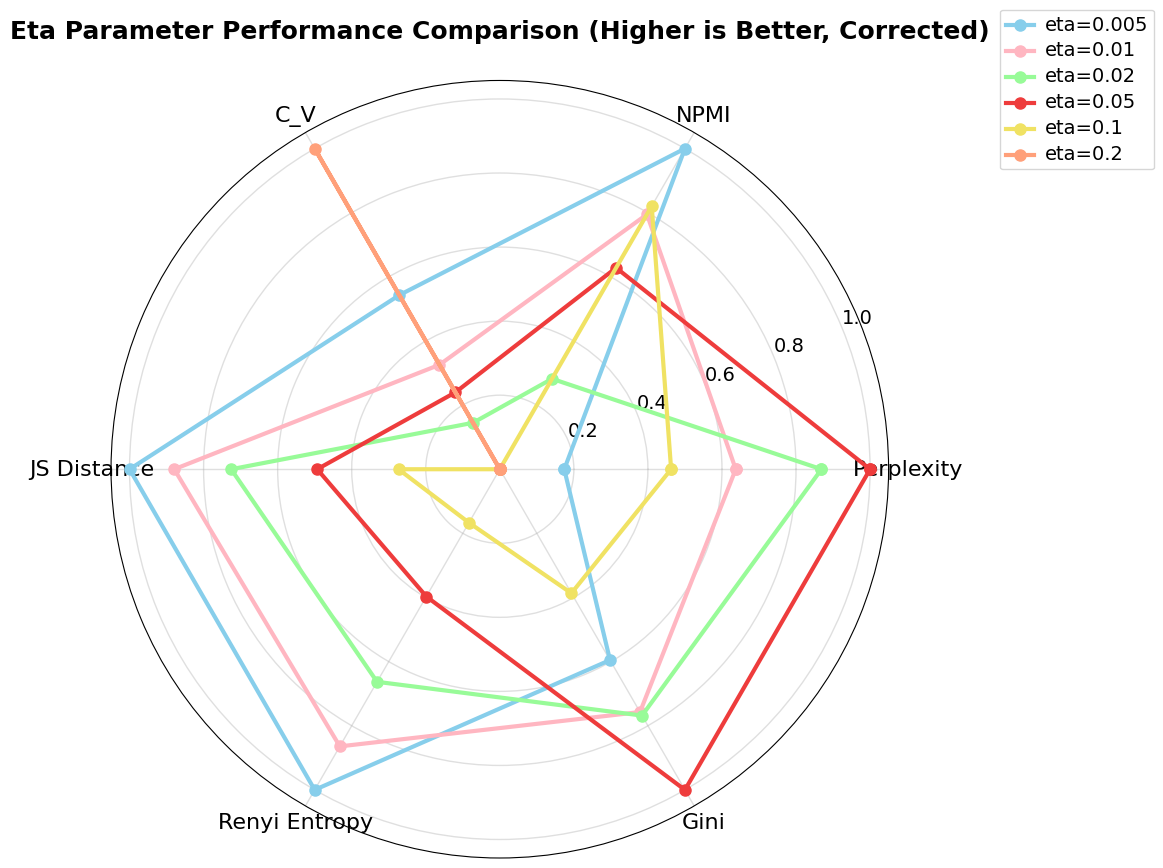

In [14]:
# ...existing code...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from math import pi
from adjustText import adjust_text # <-- 导入新库

import matplotlib.pyplot as plt
import numpy as np
from math import pi
# adjustText 不再需要，可以移除
# from adjustText import adjust_text 

def create_radar_chart(data, categories, labels, title="Radar Chart"):
    """
    Create a radar chart without value annotations.
    
    Parameters:
    data: list of lists, each inner list contains NORMALIZED values for one series
    categories: list of category names (axes)
    labels: list of series labels
    title: chart title
    """
    
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
    fig.patch.set_facecolor('white')
    
    colors = ['#87CEEB', '#FFB6C1', '#98FB98', "#EE3C3C", "#F0E263", '#FFA07A']
    
    for i, (values, label) in enumerate(zip(data, labels)):
        plot_values = values + values[:1]
        ax.plot(angles, plot_values, 'o-', linewidth=3, markersize=8,
                label=label, color=colors[i % len(colors)])
        
        # 已移除数值标注代码

    # Add category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=16)
    ax.tick_params(axis='y', labelsize=14)
    
    # Add legend
    legend = ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.1))
    plt.setp(legend.get_texts(), fontsize=14)
    
    # Add title
    plt.title(title, size=18, fontweight='bold', pad=30)
    
    # Set grid
    ax.grid(True, alpha=0.4, linewidth=1)
    
    plt.tight_layout()
    return fig

if df_perp is not None:
    # --- 2. 提取和整合数据 ---
    etas = sorted(df_perp['eta'].unique())
    metrics_df = pd.DataFrame({'eta': etas}).set_index('eta')
    
    df_coherence_l2 = df_coherence[df_coherence['layer'] == 2].set_index('eta')
    df_js_renyi_l2 = df_js_renyi[df_js_renyi['layer'] == 2].set_index('eta')
    df_gini_l2 = df_gini[df_gini['layer'] == 2].set_index('eta')
    
    metrics_df['Perplexity'] = df_perp.set_index('eta')['perplexity_mean']
    metrics_df['NPMI'] = df_coherence_l2['weighted_avg_npmi_mean']
    metrics_df['C_V'] = df_coherence_l2['weighted_avg_c_v_mean']
    metrics_df['JS Distance'] = df_js_renyi_l2['avg_js_distance_mean']
    metrics_df['Renyi Entropy'] = df_js_renyi_l2['weighted_avg_renyi_entropy_mean']
    metrics_df['Gini'] = df_gini_l2['gini_doc_distribution_mean']
    
    print("\n原始指标数据:")
    print(metrics_df)

    # --- 3. 数据归一化 (越高越好) ---
    # 步骤1: Min-Max Scaling
    scaled_df = (metrics_df - metrics_df.min()) / (metrics_df.max() - metrics_df.min())
    
    # 步骤2: 方向统一 (根据您的最新指示进行修正)
    normalized_df = scaled_df.copy()
    # 对于“越低越好”的指标，进行翻转 (1 - scaled_value)
    lower_is_better = ['Perplexity', 'Gini', 'Renyi Entropy']
    for col in lower_is_better:
        if col in normalized_df.columns:
            normalized_df[col] = 1 - normalized_df[col]
            
    print("\n归一化后指标数据 (越高越好, 已修正):")
    print(normalized_df)

    # --- 4. 准备绘图数据并调用雷达图函数 ---
    categories = normalized_df.columns.tolist()
    labels = [f"eta={eta}" for eta in normalized_df.index]
    
    # 准备归一化数据和原始数据
    normalized_data = normalized_df.values.tolist()
    raw_data_for_annotation = metrics_df.values.tolist()
    
    # 调用更新后的 create_radar_chart 函数
    try:
        fig = create_radar_chart(
            data=normalized_data, 
            categories=categories, 
            labels=labels, 
            title="Eta Parameter Performance Comparison (Higher is Better, Corrected)"
        )
        
        output_path = Path("./output_fig")
        output_path.mkdir(exist_ok=True)
        fig.savefig(output_path / "eta_performance_radar_chart_higher_is_better_corrected.png", dpi=300, bbox_inches='tight')
        print(f"\n雷达图已保存到: {output_path / 'eta_performance_radar_chart_higher_is_better_corrected.png'}")
        
        plt.show()
    except NameError:
        print("\n错误: `create_radar_chart` 函数未定义。请先运行包含该函数定义的单元格。")

所有 Step3 数据文件加载成功。

原始指标数据 (Alpha):
       Perplexity    NPMI     C_V  JS Distance  Renyi Entropy    Gini  \
alpha                                                                   
0.01     896.6313  0.0646  0.5643       0.5699         4.6082  0.4164   
0.05     957.2424  0.0705  0.5615       0.5650         4.6579  0.4597   
0.10     861.8533  0.0766  0.5701       0.5739         4.4826  0.3857   
0.20     880.4972  0.0635  0.5633       0.5665         4.5243  0.3757   
0.50     966.6996  0.0641  0.5516       0.5713         4.5070  0.4065   
1.00     927.1719  0.0550  0.5525       0.5627         4.5213  0.4175   

       Simple Layer JS  Weighted Inner JS  
alpha                                      
0.01            0.5699           0.604185  
0.05            0.5650           0.611926  
0.10            0.5739           0.629205  
0.20            0.5665           0.628248  
0.50            0.5713           0.657178  
1.00            0.5627           0.644556  

归一化后指标数据 (越高越好):
       Pe

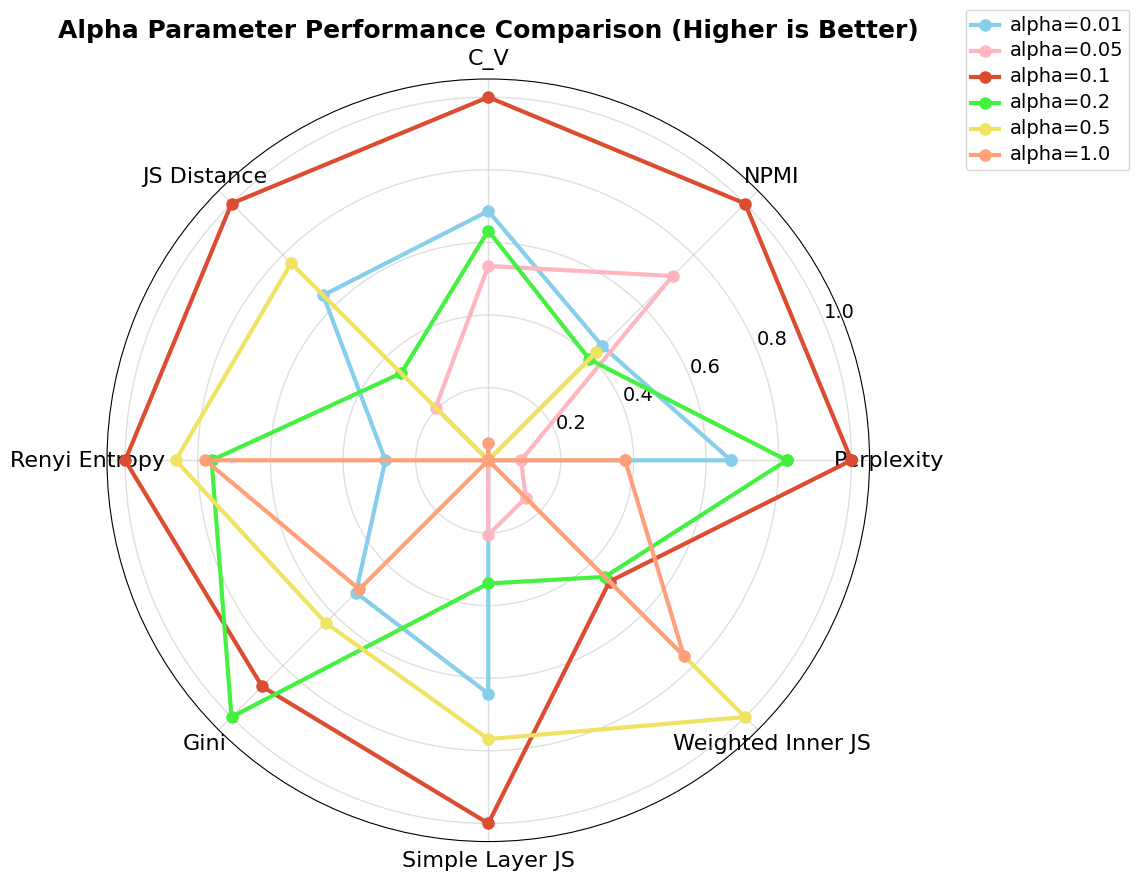

In [26]:
# --- Alpha 参数雷达图分析 ---
def create_radar_chart(data, categories, labels, title="Radar Chart"):
    """
    Create a radar chart without value annotations.
    
    Parameters:
    data: list of lists, each inner list contains NORMALIZED values for one series
    categories: list of category names (axes)
    labels: list of series labels
    title: chart title
    """
    
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
    fig.patch.set_facecolor('white')
    
    colors = ['#87CEEB', '#FFB6C1', "#DC4C30", "#44F141", "#F0E263", '#FFA07A']
    
    for i, (values, label) in enumerate(zip(data, labels)):
        plot_values = values + values[:1]
        ax.plot(angles, plot_values, 'o-', linewidth=3, markersize=8,
                label=label, color=colors[i % len(colors)])
        
        # 已移除数值标注代码

    # Add category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=16)
    ax.tick_params(axis='y', labelsize=14)
    
    # Add legend
    legend = ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.1))
    plt.setp(legend.get_texts(), fontsize=14)
    
    # Add title
    plt.title(title, size=18, fontweight='bold', pad=30)
    
    # Set grid
    ax.grid(True, alpha=0.4, linewidth=1)
    
    plt.tight_layout()
    return fig

# 1. 加载所有需要的CSV文件
base_path = Path("/Volumes/My Passport/收敛结果/step3")
data_loaded = True
try:
    df_perp = pd.read_csv(base_path / "04_alpha_perplexity_comparison.csv")
    df_coherence = pd.read_csv(base_path / "03_alpha_coherence_layer_comparison_k5.csv")
    df_js_renyi = pd.read_csv(base_path / "01_alpha_layer_comparison.csv")
    df_gini = pd.read_csv(base_path / "05_alpha_layer_branching_gini_comparison.csv")
    df_w_jsd = pd.read_csv(base_path / "02_alpha_inter_layer_jsd_comparison_weighted.csv")
    
    print("所有 Step3 数据文件加载成功。")
except FileNotFoundError as e:
    print(f"错误：文件未找到 - {e}")
    data_loaded = False

if data_loaded:
    # --- 2. 提取和整合数据 ---
    # 将所有 'eta' 列重命名为 'alpha' 以统一处理
    df_perp.rename(columns={'eta': 'alpha'}, inplace=True)
    df_coherence.rename(columns={'eta': 'alpha'}, inplace=True)
    df_js_renyi.rename(columns={'eta': 'alpha'}, inplace=True)
    df_gini.rename(columns={'eta': 'alpha'}, inplace=True)
    df_w_jsd.rename(columns={'eta': 'alpha'}, inplace=True)

    alphas = sorted(df_perp['alpha'].unique())
    metrics_df = pd.DataFrame({'alpha': alphas}).set_index('alpha')
    
    # --- 修正：明确区分使用 layer 和 child_layer 进行筛选 ---
    # 使用 'layer' == 2 的指标
    df_coherence_l2 = df_coherence[df_coherence['layer'] == 2].set_index('alpha')
    df_js_renyi_l2 = df_js_renyi[df_js_renyi['layer'] == 2].set_index('alpha')
    df_gini_l2 = df_gini[df_gini['layer'] == 2].set_index('alpha')
    
    # 使用 'child_layer' == 2.0 的指标
    df_simple_js_l2 = df_js_renyi[df_js_renyi['layer'] == 2.0].set_index('alpha')
    df_w_jsd_l2 = df_w_jsd[df_w_jsd['child_layer'] == 2.0].set_index('alpha')
    
    # 填充指标数据
    metrics_df['Perplexity'] = df_perp.set_index('alpha')['perplexity_mean']
    metrics_df['NPMI'] = df_coherence_l2['weighted_avg_npmi_mean']
    metrics_df['C_V'] = df_coherence_l2['weighted_avg_c_v_mean']
    metrics_df['JS Distance'] = df_js_renyi_l2['avg_js_distance_mean']
    metrics_df['Renyi Entropy'] = df_js_renyi_l2['weighted_avg_renyi_entropy_mean']
    metrics_df['Gini'] = df_gini_l2['gini_doc_distribution_mean']
    metrics_df['Simple Layer JS'] = df_simple_js_l2['avg_js_distance_mean']
    metrics_df['Weighted Inner JS'] = df_w_jsd_l2['weighted_avg_js_distance_mean']
    
    print("\n原始指标数据 (Alpha):")
    print(metrics_df)

    # --- 3. 数据归一化 (越高越好) ---
    # 步骤1: Min-Max Scaling
    scaled_df = (metrics_df - metrics_df.min()) / (metrics_df.max() - metrics_df.min())
    
    # 步骤2: 方向统一
    normalized_df = scaled_df.copy()
    lower_is_better = ['Perplexity', 'Gini', 'Renyi Entropy']
    for col in lower_is_better:
        if col in normalized_df.columns:
            normalized_df[col] = 1 - normalized_df[col]
            
    print("\n归一化后指标数据 (越高越好):")
    print(normalized_df)

    # --- 4. 准备绘图数据并调用雷达图函数 ---
    categories = normalized_df.columns.tolist()
    labels = [f"alpha={alpha}" for alpha in normalized_df.index]
    normalized_data = normalized_df.values.tolist()
    
    try:
        fig = create_radar_chart(
            data=normalized_data, 
            categories=categories, 
            labels=labels, 
            title="Alpha Parameter Performance Comparison (Higher is Better)"
        )
        
        output_path = Path("./output_fig")
        output_path.mkdir(exist_ok=True)
        fig.savefig(output_path / "alpha_performance_radar_chart_higher_is_better.png", dpi=300, bbox_inches='tight')
        print(f"\n雷达图已保存到: {output_path / 'alpha_performance_radar_chart_higher_is_better.png'}")
        
        plt.show()
    except NameError:
        print("\n错误: `create_radar_chart` 函数未定义。请先运行包含该函数定义的单元格。")